# 1. Tổng quan dữ liệu

In [1]:
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('Dataset/full_data_flightdelay.csv')

In [ ]:
df.shape

(6489062, 26)

In [ ]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
df.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
6489057,12,7,0,2300-2359,1,11,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489058,12,7,0,1800-1859,1,11,2,123,Hawaiian Airlines Inc.,1318,...,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489059,12,7,0,2000-2059,1,11,2,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489060,12,7,0,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489061,12,7,1,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,...,15,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [ ]:
df.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,6489062.0,6.607062e+00,3.396853e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,6489062.0,3.935598e+00,1.995200e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,6489062.0,1.891441e-01,3.916231e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,6489062.0,3.821102e+00,2.382233e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,6489062.0,3.046890e+00,1.757864e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,6489062.0,2.783675e+01,2.151060e+01,1.000000,1.100000e+01,2.300000e+01,3.900000e+01,1.090000e+02
NUMBER_OF_SEATS,6489062.0,1.337397e+02,4.645213e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,6489062.0,1.268458e+04,8.839796e+03,1100.000000,5.345000e+03,1.156200e+04,1.761500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,6489062.0,6.296058e+04,3.438223e+04,5582.000000,2.503400e+04,7.087800e+04,8.631200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,6489062.0,3.459251e+03,4.251139e+03,1.000000,6.540000e+02,2.251000e+03,4.806000e+03,2.183700e+04


In [ ]:
df.describe(include='O')

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
count,6489062,6489062,6489062,6489062
unique,19,17,96,356
top,0800-0859,Southwest Airlines Co.,Atlanta Municipal,NONE
freq,452391,1296329,392603,1449009


In [4]:
#Check null data
df.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [5]:
#Dealing with duplicate data
df.duplicated().sum()

28473

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

0

**Data Reduction**

In [ ]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 6460589 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   MONTH                          int8    
 1   DAY_OF_WEEK                    int8    
 2   DEP_DEL15                      int8    
 3   DEP_TIME_BLK                   category
 4   DISTANCE_GROUP                 int8    
 5   SEGMENT_NUMBER                 int8    
 6   CONCURRENT_FLIGHTS             int8    
 7   NUMBER_OF_SEATS                int16   
 8   CARRIER_NAME                   category
 9   AIRPORT_FLIGHTS_MONTH          int32   
 10  AIRLINE_FLIGHTS_MONTH          int32   
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int16   
 12  AVG_MONTHLY_PASS_AIRPORT       int32   
 13  AVG_MONTHLY_PASS_AIRLINE       int32   
 14  FLT_ATTENDANTS_PER_PASS        float16 
 15  GROUND_SERV_PER_PASS           float16 
 16  PLANE_AGE                      int8    
 17  DEPARTING_AIRPORT              c

In [7]:
def reduce_mem_usage(df):
    """ Iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
      """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype    
        if col_type == 'category':
            continue
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            # Convert object types to category
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
df = reduce_mem_usage(df)

Memory usage of dataframe is 1330.84 MB
Memory usage after optimization is: 357.37 MB
Decreased by 73.1%


# 2. Phân tích và khám phá dữ liệu

**Phân phối biến số**

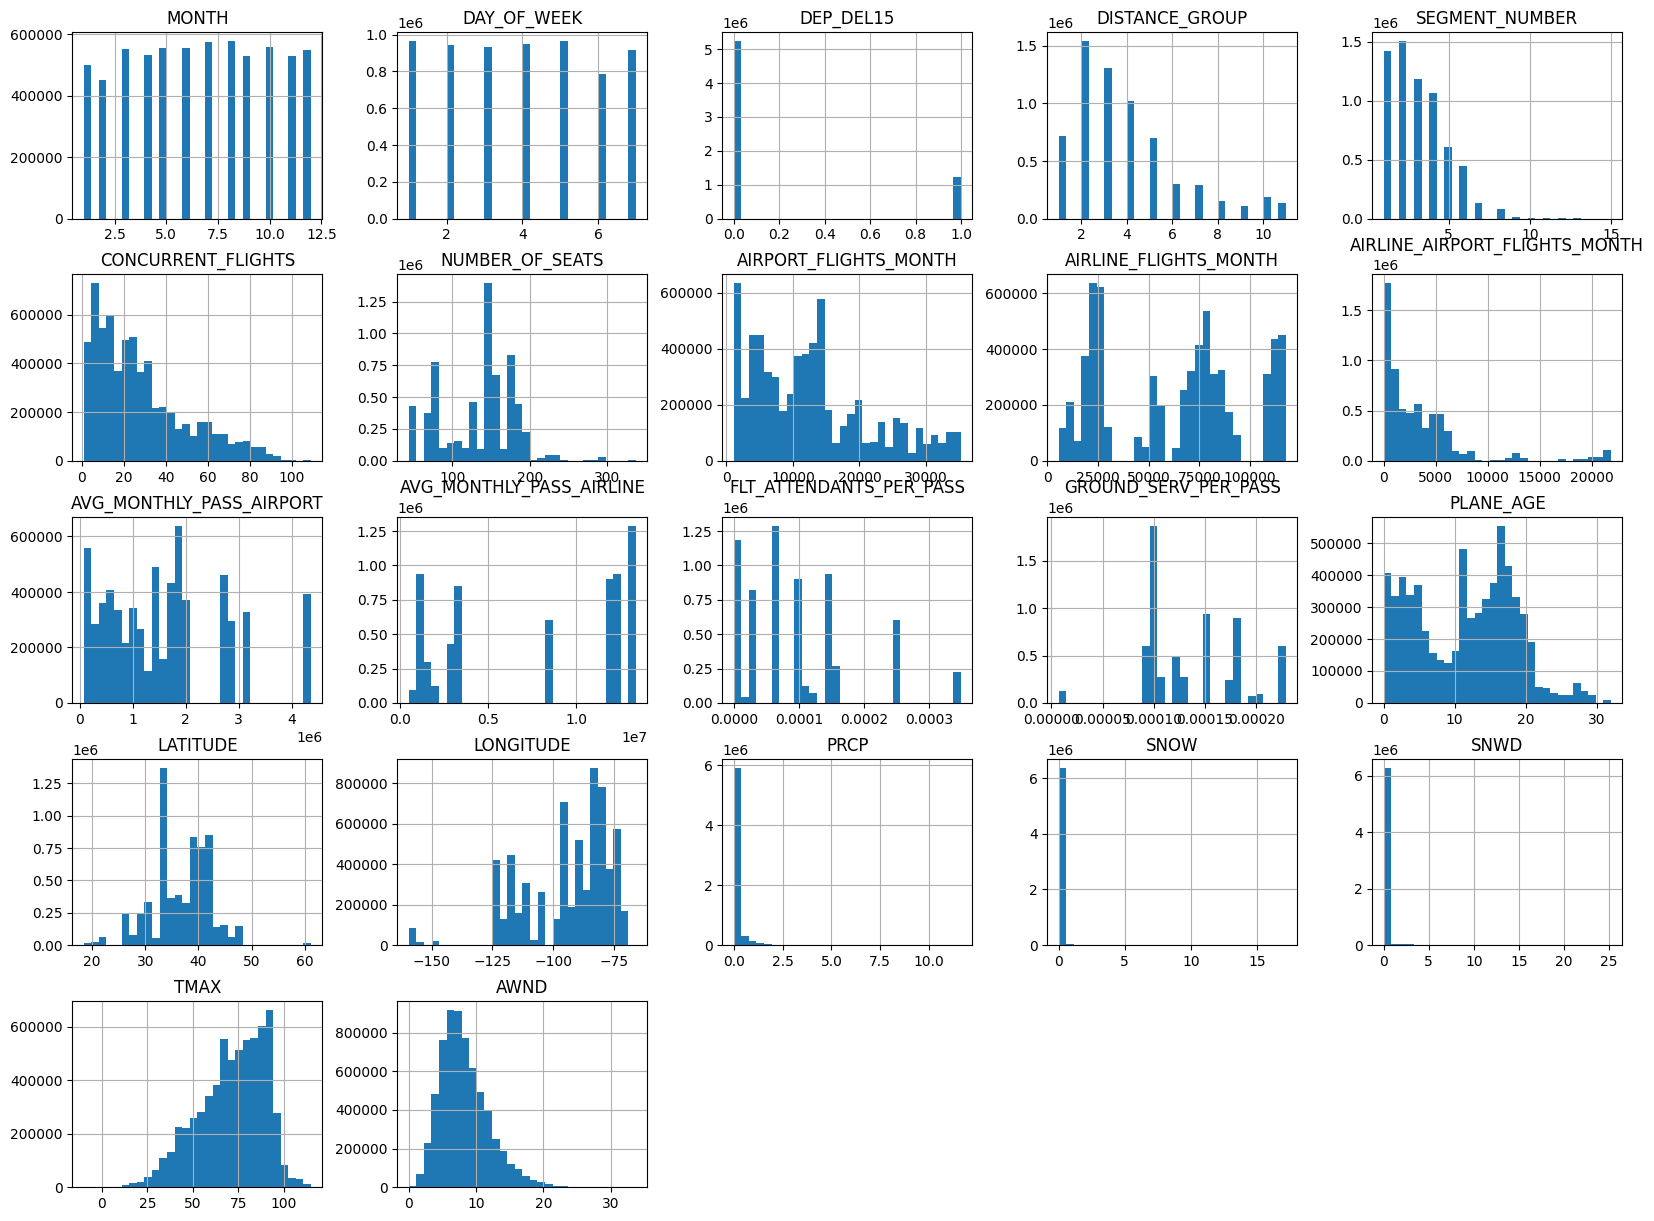

In [ ]:
# Phân phối 
df.hist(bins=30, figsize=(20, 15))
plt.show()

### **Month column**

In [ ]:
#Month
print("Các giá trị duy nhất của cột MONTH:")
print(df['MONTH'].unique())

Các giá trị duy nhất của cột MONTH:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


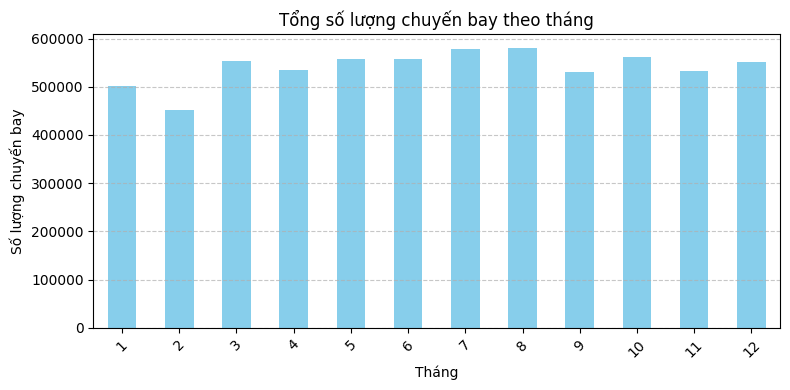

In [ ]:
# Tính tổng số lượng chuyến bay của từng tháng và vẽ biểu đồ
plt.figure(figsize=(8, 4))
df.groupby('MONTH').size().plot(kind='bar', color='skyblue')
plt.title('Total number of flights per month')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

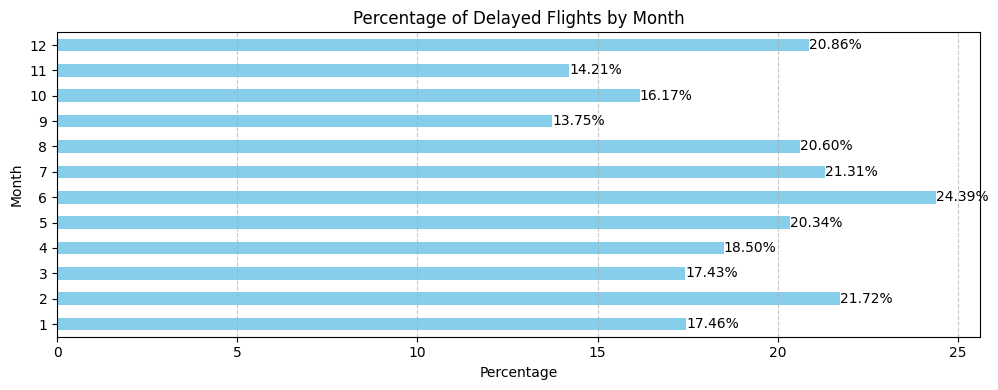

In [ ]:
total = df['MONTH'].value_counts().sort_index()
delaye = df[df['DEP_DEL15'] == 1]['MONTH'].value_counts().sort_index()
# Tính tỷ lệ phần trăm các chuyến bay bị trễ
delayed_percent = (delaye / total * 100).fillna(0)
plt.figure(figsize=(10, 4))
bars = delayed_percent.plot(kind='barh', color='skyblue')
plt.title('Percentage of Delayed Flights by Month')
plt.xlabel('Percentage')
plt.ylabel('Month')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             va='center', ha='left', color='black', fontsize=10)

plt.show()

### **Day of week column**

In [ ]:
#DAY_OF_WEEK
# QUANTYTI UNIQUE DAY OF WEEK VALUE
print(df['DAY_OF_WEEK'].unique())

[7 5 3 4 2 1 6]


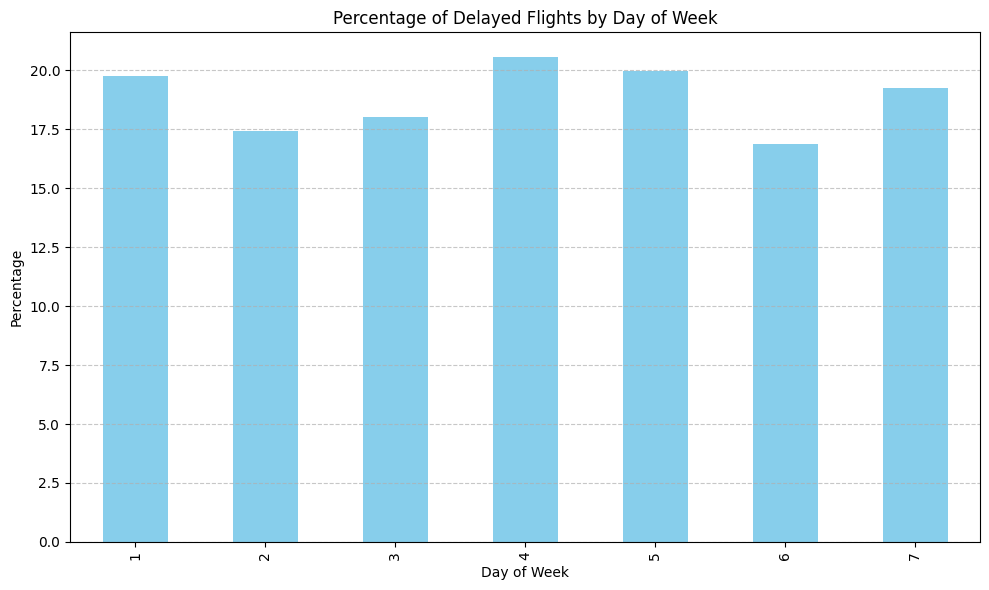

In [ ]:
delayed_flights_per_day = df[df['DEP_DEL15'] == 1].groupby('DAY_OF_WEEK').size()
total_flights_per_day = df.groupby('DAY_OF_WEEK').size()
delayed_percentage_per_day = (delayed_flights_per_day / total_flights_per_day) * 100

plt.figure(figsize=(10, 6))
delayed_percentage_per_day.plot(kind='bar', color='skyblue')
plt.title('Percentage of Delayed Flights by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

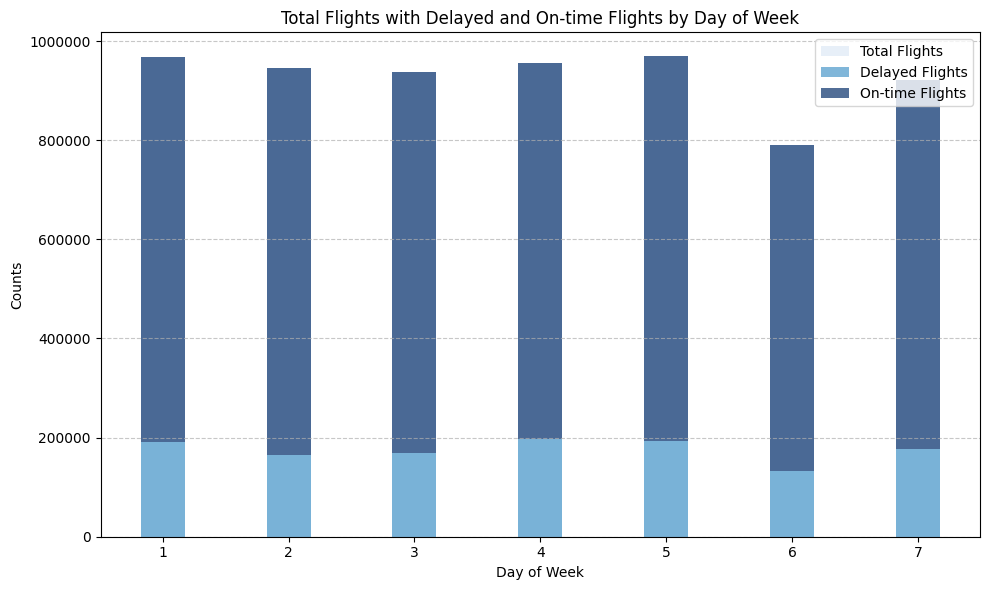

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.2, 1, 3))
bar_width = 0.35
index = np.arange(len(delayed_percentage_per_day))

plt.bar(index, total_flights_per_day, bar_width, color=colors[0], alpha=0.5, label='Total Flights')
plt.bar(index, delayed_flights_per_day, bar_width, color=colors[1], alpha=0.7, label='Delayed Flights')
ontime_flights_per_day = total_flights_per_day - delayed_flights_per_day

plt.bar(index, ontime_flights_per_day, bar_width, bottom=delayed_flights_per_day, color=colors[2], alpha=0.7, label='On-time Flights')
plt.xlabel('Day of Week')
plt.ylabel('Counts')
plt.title('Total Flights with Delayed and On-time Flights by Day of Week')

plt.xticks(index, delayed_percentage_per_day.index)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **Departing time block**

In [ ]:
#DEP_TIME_BLK
# QUANTYTI UNIQUE DEPARTURE TIME BLOCK VALUE
print(df['DEP_TIME_BLK'].unique())
print(df['DEP_TIME_BLK'].dtype)

['0800-0859', '0700-0759', '0600-0659', '0001-0559', '2300-2359', ..., '1800-1859', '1900-1959', '1600-1659', '1700-1759', '2100-2159']
Length: 19
Categories (19, object): ['0001-0559', '0600-0659', '0700-0759', '0800-0859', ..., '2000-2059', '2100-2159', '2200-2259', '2300-2359']
category


In [8]:
# Chuyển đổi cột sang dạng dữ liệu category
df['DEP_TIME_BLK'] = df['DEP_TIME_BLK'].astype('category')
print(df['DEP_TIME_BLK'].dtype)

category


C:\Users\ADMINS\AppData\Local\Temp\ipykernel_8828\4009148252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_per_block = df.groupby('DEP_TIME_BLK').size()
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_8828\4009148252.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delayed_flights_per_block = df[df['DEP_DEL15'] == 1].groupby('DEP_TIME_BLK').size()


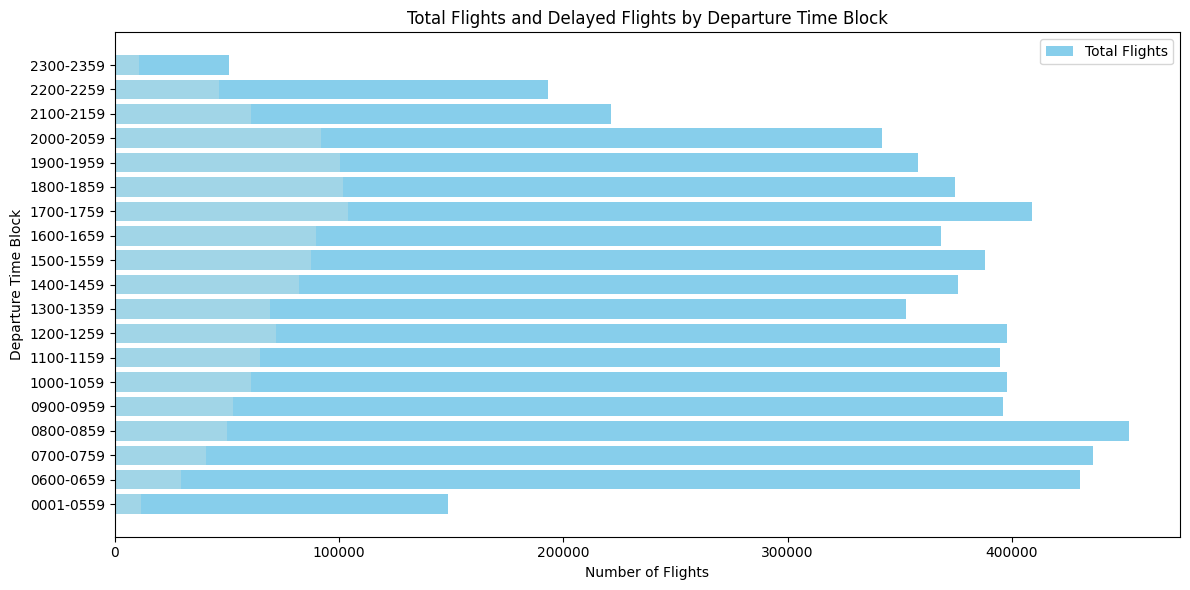

In [ ]:
flights_per_block = df.groupby('DEP_TIME_BLK').size()
delayed_flights_per_block = df[df['DEP_DEL15'] == 1].groupby('DEP_TIME_BLK').size()

plt.figure(figsize=(12, 6))
plt.barh(flights_per_block.index, flights_per_block, color='skyblue', label='Total Flights')
for index, value in enumerate(delayed_flights_per_block):
    plt.barh(delayed_flights_per_block.index[index], value, color='lightblue', alpha=0.7)

plt.ylabel('Departure Time Block')
plt.xlabel('Number of Flights')
plt.title('Total Flights and Delayed Flights by Departure Time Block')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
time_blk = df[['DEP_TIME_BLK','DEP_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='DEP_DEL15',ascending=False)
time_blk['PERCENTUAL'] = time_blk['DEP_DEL15']/(time_blk['DEP_DEL15'].sum())*100
time_blk

,DEP_DEL15,PERCENTUAL
DEP_TIME_BLK,,
1700-1759,104046,8.477164
1800-1859,101993,8.309896
1900-1959,100564,8.193468
2000-2059,91811,7.480316
1600-1659,89612,7.301152
1500-1559,87336,7.115714
1400-1459,82138,6.692206
1200-1259,71869,5.855538
1300-1359,69102,5.630096


### **Distance group**

In [ ]:
#DISTANCE_GROUP
print(df['DISTANCE_GROUP'].value_counts())

DISTANCE_GROUP
2     1547851
3     1315004
4     1029580
1      717985
5      703113
6      300148
7      289456
10     188059
8      155872
11     135096
9      106898
Name: count, dtype: int64


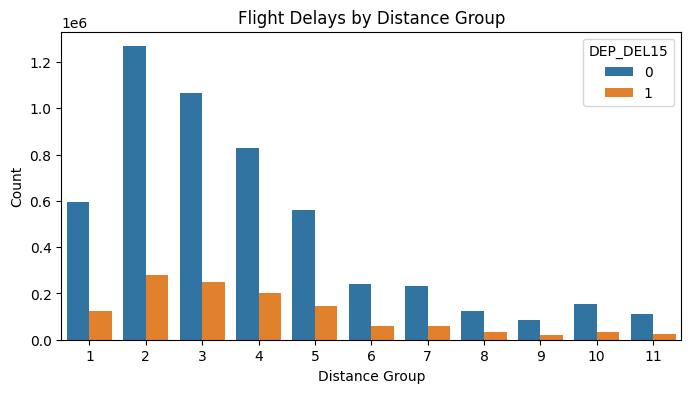

In [ ]:
#DISTANCE_GROUP
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DISTANCE_GROUP', hue='DEP_DEL15')
plt.title('Flight Delays by Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Count')

plt.show()

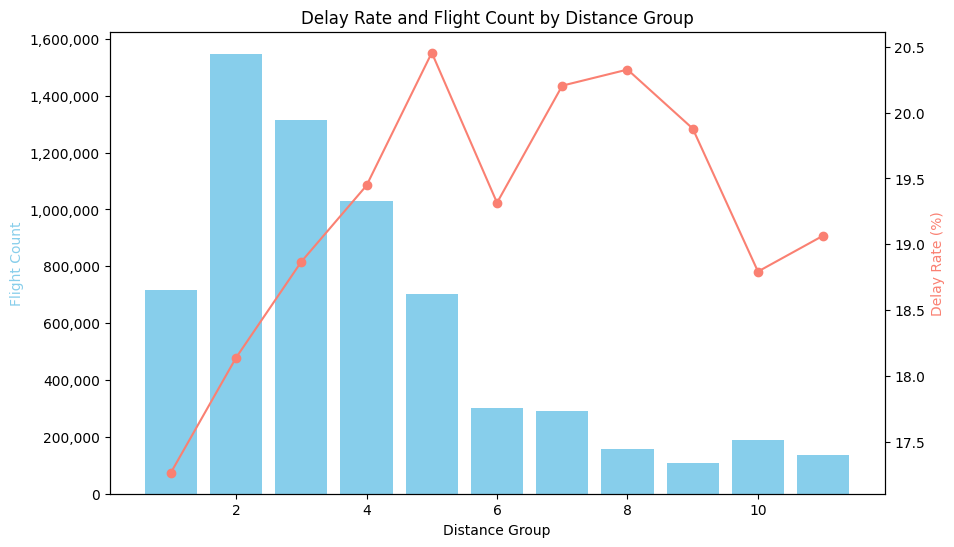

In [ ]:
from matplotlib.ticker import FuncFormatter
flight_count = df['DISTANCE_GROUP'].value_counts().reset_index()
flight_count.columns = ['DISTANCE_GROUP', 'FLIGHT_COUNT']

delayed_flights = df[df['DEP_DEL15'] == 1].groupby('DISTANCE_GROUP')['DEP_DEL15'].count().reset_index()
delayed_flights.columns = ['DISTANCE_GROUP', 'DELAYED_FLIGHTS']

delay_rate = pd.merge(flight_count, delayed_flights, on='DISTANCE_GROUP', how='left')
delay_rate['DELAY_RATE'] = (delay_rate['DELAYED_FLIGHTS'] / delay_rate['FLIGHT_COUNT']) * 100

delay_rate = delay_rate.sort_values(by='DISTANCE_GROUP')
flight_count = delay_rate[['DISTANCE_GROUP', 'FLIGHT_COUNT']]  

def integer_format(x, pos):
  return f'{int(x):,}'

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(flight_count['DISTANCE_GROUP'], flight_count['FLIGHT_COUNT'], color='skyblue')
ax1.set_ylabel('Flight Count', color='skyblue')
ax1.yaxis.set_major_formatter(FuncFormatter(integer_format))

ax2 = ax1.twinx()
ax2.plot(delay_rate['DISTANCE_GROUP'], delay_rate['DELAY_RATE'], marker='o', color='salmon')
ax2.set_ylabel('Delay Rate (%)', color='salmon')
ax1.set_xlabel('Distance Group')
plt.title('Delay Rate and Flight Count by Distance Group')
plt.show()

### **SEGMENT NUMBER**

In [ ]:
df['DEP_DEL15'].count()
df['AVG_MONTHLY_PASS_AIRPORT']

6489062

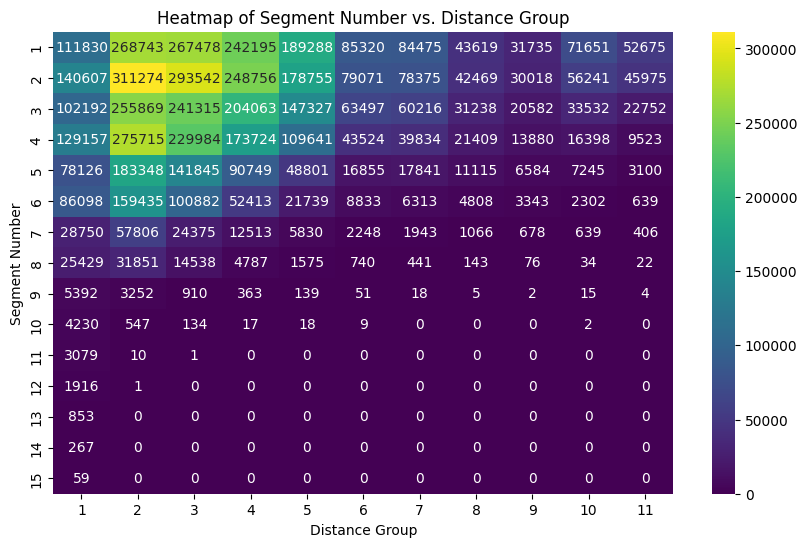

In [ ]:
heatmap_data = pd.crosstab(df['SEGMENT_NUMBER'], df['DISTANCE_GROUP'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Segment Number vs. Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Segment Number')
plt.show()

In [ ]:
# SEGMENT_NUMBER
df['SEGMENT_NUMBER'].value_counts()

SEGMENT_NUMBER
2     1505083
1     1449009
3     1182583
4     1062789
5      605609
6      446805
7      136254
8       79636
9       10151
10       4957
11       3090
12       1917
13        853
14        267
15         59
Name: count, dtype: int64

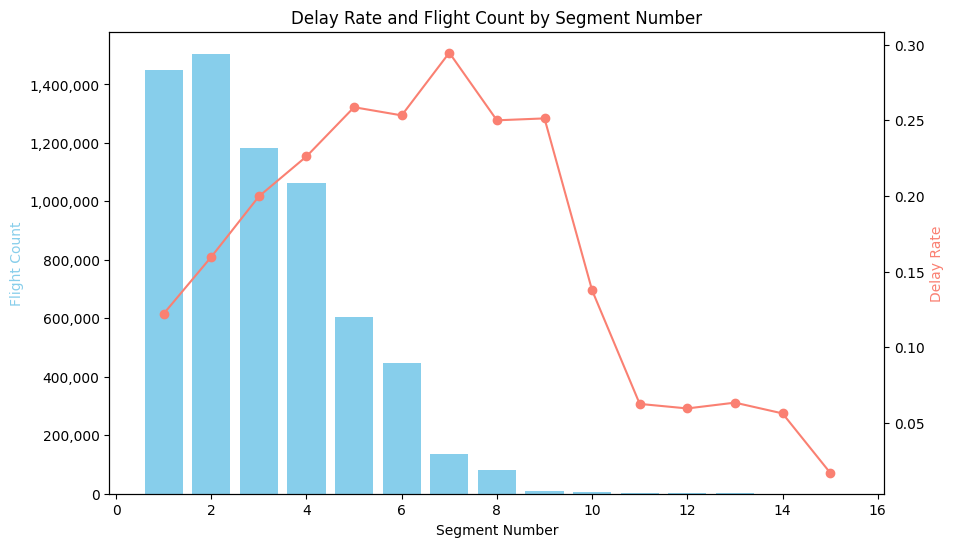

In [ ]:
delay_rate = df.groupby('SEGMENT_NUMBER')['DEP_DEL15'].mean().reset_index()
flight_count = df['SEGMENT_NUMBER'].value_counts().reset_index()
flight_count.columns = ['SEGMENT_NUMBER', 'FLIGHT_COUNT']
flight_count = flight_count.sort_values(by='SEGMENT_NUMBER')

segment_delay_rate = delay_rate.sort_values(by='SEGMENT_NUMBER')
def integer_format(x, pos):
    return f'{int(x):,}'
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(flight_count['SEGMENT_NUMBER'], flight_count['FLIGHT_COUNT'], color='skyblue')
ax1.set_ylabel('Flight Count', color='skyblue')
ax1.yaxis.set_major_formatter(FuncFormatter(integer_format))  # Đảm bảo trục y hiển thị số tự nhiên
ax2 = ax1.twinx()
ax2.plot(delay_rate['SEGMENT_NUMBER'], delay_rate['DEP_DEL15'], marker='o', color='salmon')
ax2.set_ylabel('Delay Rate', color='salmon')
ax1.set_xlabel('Segment Number')
plt.title('Delay Rate and Flight Count by Segment Number')
plt.show()


### **CARRIER NAME**

In [ ]:
# CARRIER_NAME
df['CARRIER_NAME'].unique()

array(['Southwest Airlines Co.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Frontier Airlines Inc.',
       'Alaska Airlines Inc.', 'Hawaiian Airlines Inc.',
       'American Airlines Inc.', 'United Air Lines Inc.',
       'JetBlue Airways', 'Allegiant Air', 'SkyWest Airlines Inc.',
       'Mesa Airlines Inc.', 'American Eagle Airlines Inc.',
       'Midwest Airline, Inc.', 'Comair Inc.', 'Endeavor Air Inc.',
       'Atlantic Southeast Airlines'], dtype=object)

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_7092\2616907188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_flights_per_airline = df.groupby('CARRIER_NAME')['DEP_DEL15'].count()
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_7092\2616907188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delayed_flights_per_airline = df[df['DEP_DEL15'] == 1].groupby('CARRIER_NAME')['DEP_DEL15'].count()


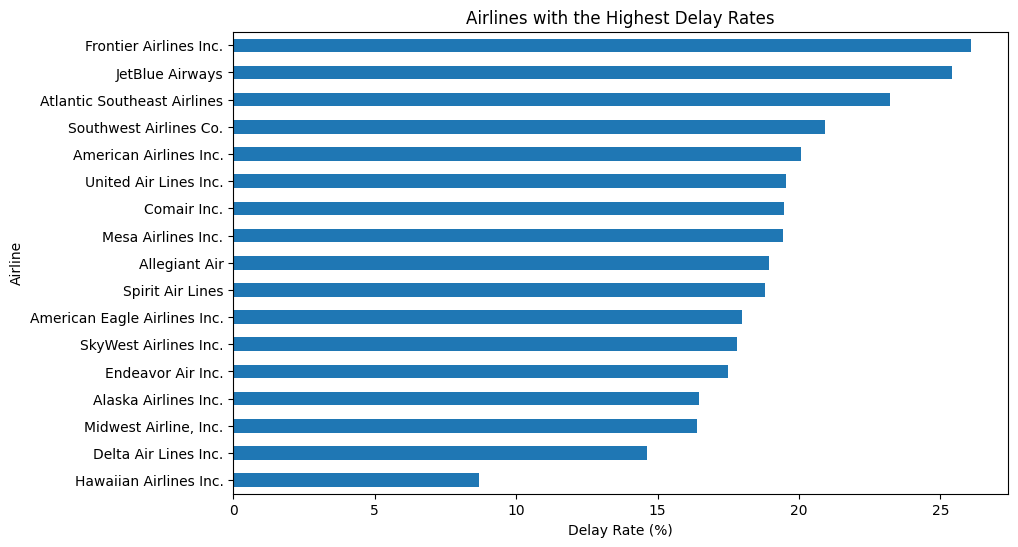

In [ ]:
total_flights_per_airline = df.groupby('CARRIER_NAME')['DEP_DEL15'].count()
delayed_flights_per_airline = df[df['DEP_DEL15'] == 1].groupby('CARRIER_NAME')['DEP_DEL15'].count()

delay_percentage = delayed_flights_per_airline / total_flights_per_airline * 100
delayed_carriers = delay_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
delayed_carriers.plot(kind='barh')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Airline')
plt.title('Airlines with the Highest Delay Rates')
plt.gca().invert_yaxis()
plt.show()


### **Plane age**

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_7092\467934955.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_data['DELAYED_FLIGHTS'].fillna(0, inplace=True)


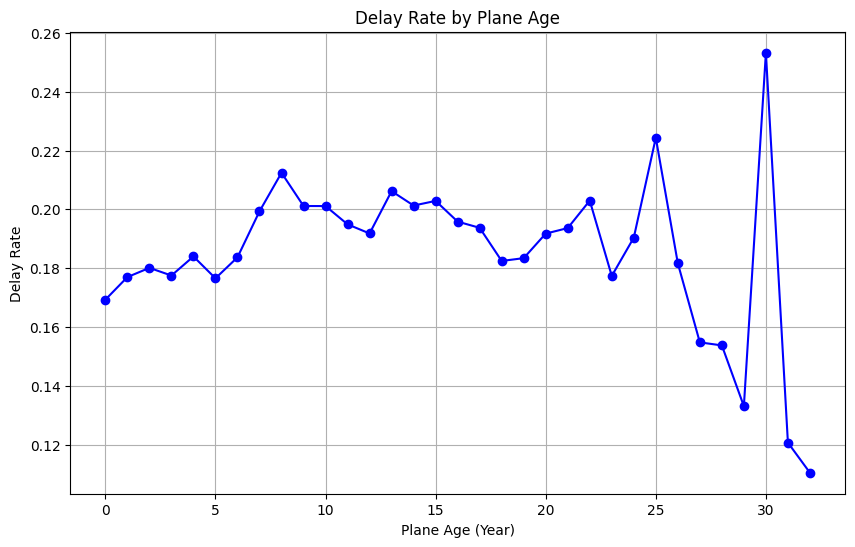

In [ ]:
total_flights = df.groupby('PLANE_AGE')['DEP_DEL15'].count().reset_index()
total_flights.rename(columns={'DEP_DEL15': 'TOTAL_FLIGHTS'}, inplace=True)

delayed_flights = df[df['DEP_DEL15'] == 1]

delayed_flights_count = delayed_flights.groupby('PLANE_AGE')['DEP_DEL15'].count().reset_index()
delayed_flights_count.rename(columns={'DEP_DEL15': 'DELAYED_FLIGHTS'}, inplace=True)

flight_data = pd.merge(total_flights, delayed_flights_count, on='PLANE_AGE', how='left')
flight_data['DELAYED_FLIGHTS'].fillna(0, inplace=True)  

flight_data['DELAY_RATE'] = flight_data['DELAYED_FLIGHTS'] / flight_data['TOTAL_FLIGHTS']
plt.figure(figsize=(10, 6))
plt.plot(flight_data['PLANE_AGE'], flight_data['DELAY_RATE'], marker='o', linestyle='-', color='b')
plt.title('Delay Rate by Plane Age')
plt.xlabel('Plane Age (Year)')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()


### Airport

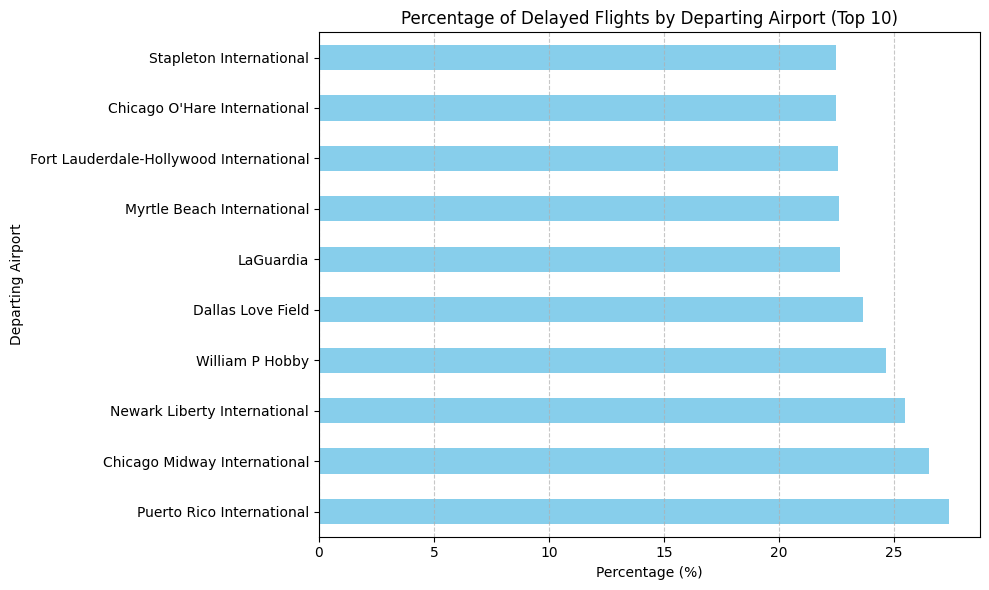

In [ ]:
## top 10 sân bay có tỉ lệ trễ cao nhất
delayed_flights_per_airport = df[df['DEP_DEL15'] == 1].groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()
total_flights_per_airport = df.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()
delayed_percentage_per_airport = (delayed_flights_per_airport / total_flights_per_airport) * 100

delayed_percentage_per_airport = delayed_percentage_per_airport.sort_values(ascending=False)

top_n_airports = 10
delayed_percentage_per_airport = delayed_percentage_per_airport.head(top_n_airports)
plt.figure(figsize=(10, 6))
delayed_percentage_per_airport.plot(kind='barh', color='skyblue')
plt.title(f'Percentage of Delayed Flights by Departing Airport (Top {top_n_airports})')
plt.xlabel('Percentage (%)')
plt.ylabel('Departing Airport')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(range(len(delayed_percentage_per_airport)), delayed_percentage_per_airport.index)
plt.tight_layout()
plt.show()

In [ ]:
# Top 3 sân bay có tỉ lệ trễ cao nhất trên 25%
# Puerto Rico International                  27.380952
# Chicago Midway International               26.536899
# Newark Liberty International               25.472909

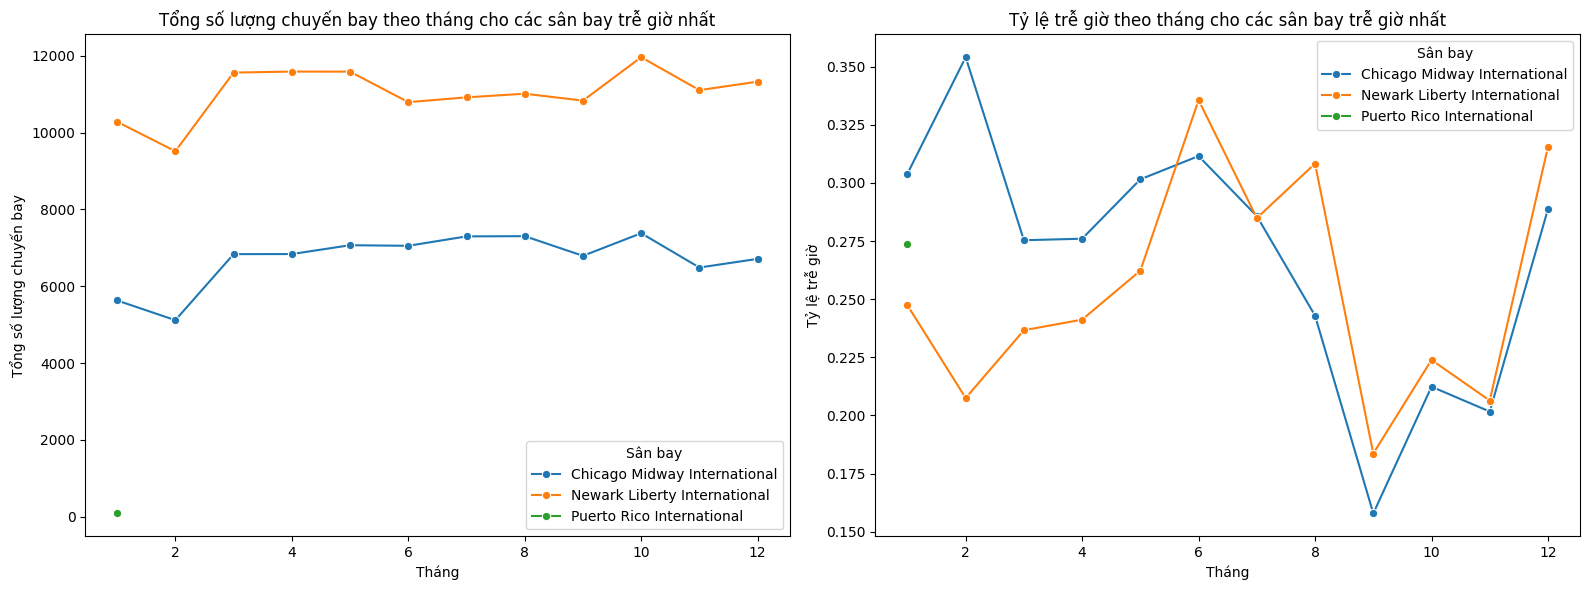

In [ ]:
top_airports_delayed = ['Puerto Rico International', 'Chicago Midway International', 'Newark Liberty International']
df_delayed_airports = df[df['DEPARTING_AIRPORT'].isin(top_airports_delayed)]

monthly_stats_delayed = df_delayed_airports.groupby(['MONTH', 'DEPARTING_AIRPORT']).agg(
    total_flights=('DEP_DEL15', 'count'),
    delayed_flights=('DEP_DEL15', lambda x: (x == 1).sum())
).reset_index()

monthly_stats_delayed['delay_ratio'] = monthly_stats_delayed['delayed_flights'] / monthly_stats_delayed['total_flights']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(data=monthly_stats_delayed, x='MONTH', y='total_flights', hue='DEPARTING_AIRPORT', marker='o', ax=axes[0])
axes[0].set_title('Tổng số lượng chuyến bay theo tháng cho các sân bay trễ giờ nhất')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Tổng số lượng chuyến bay')
axes[0].legend(title='Sân bay')

sns.lineplot(data=monthly_stats_delayed, x='MONTH', y='delay_ratio', hue='DEPARTING_AIRPORT', marker='o', ax=axes[1])
axes[1].set_title('Tỷ lệ trễ giờ theo tháng cho các sân bay trễ giờ nhất')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Tỷ lệ trễ giờ')
axes[1].legend(title='Sân bay')

plt.tight_layout()
plt.show()


In [ ]:
df[df['DEPARTING_AIRPORT'] == 'Puerto Rico International']

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
381516,1,2,0,0001-0559,7,1,16,230,Frontier Airlines Inc.,2293,...,3,Puerto Rico International,18.44,-66.002,NONE,0.0,0.0,0.0,0.0,0.0
381517,1,2,1,0001-0559,5,1,16,230,Frontier Airlines Inc.,2293,...,2,Puerto Rico International,18.44,-66.002,NONE,0.0,0.0,0.0,0.0,0.0
381518,1,2,0,0900-0959,9,1,1,160,American Airlines Inc.,2293,...,3,Puerto Rico International,18.44,-66.002,NONE,0.0,0.0,0.0,0.0,0.0
381519,1,2,1,0001-0559,5,1,16,228,Spirit Air Lines,2293,...,3,Puerto Rico International,18.44,-66.002,NONE,0.0,0.0,0.0,0.0,0.0
381520,1,2,0,0600-0659,5,1,6,143,Southwest Airlines Co.,2293,...,17,Puerto Rico International,18.44,-66.002,NONE,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381595,1,2,0,1900-1959,7,5,5,162,JetBlue Airways,2293,...,16,Puerto Rico International,18.44,-66.002,Harry S Truman,0.0,0.0,0.0,0.0,0.0
381596,1,2,1,1900-1959,7,5,5,129,JetBlue Airways,2293,...,11,Puerto Rico International,18.44,-66.002,John F. Kennedy International,0.0,0.0,0.0,0.0,0.0
381597,1,2,1,2000-2059,5,5,2,150,JetBlue Airways,2293,...,20,Puerto Rico International,18.44,-66.002,Fort Lauderdale-Hollywood International,0.0,0.0,0.0,0.0,0.0
381598,1,2,0,1800-1859,5,5,5,143,Southwest Airlines Co.,2293,...,19,Puerto Rico International,18.44,-66.002,Tampa International,0.0,0.0,0.0,0.0,0.0


C:\Users\ADMINS\AppData\Local\Temp\ipykernel_15180\3544745872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flight_counts, x='MONTH', y='total_flights', palette='viridis')


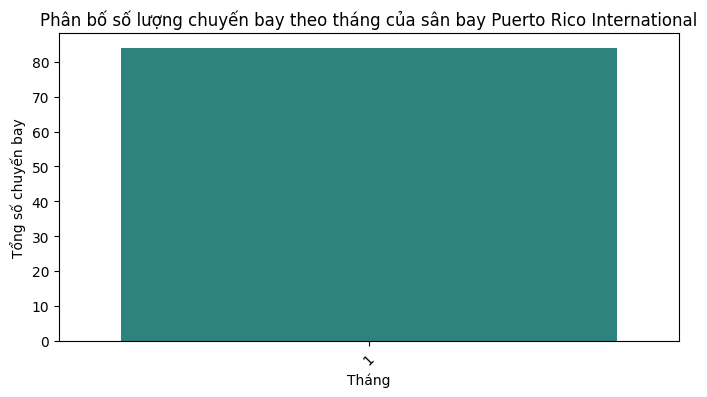

In [ ]:
puerto_rico_flights = df[df['DEPARTING_AIRPORT'] == 'Puerto Rico International']
monthly_flight_counts = puerto_rico_flights.groupby('MONTH').size().reset_index(name='total_flights')

plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_flight_counts, x='MONTH', y='total_flights', palette='viridis')
plt.title('Phân bố số lượng chuyến bay theo tháng của sân bay Puerto Rico International')
plt.xlabel('Tháng')
plt.ylabel('Tổng số chuyến bay')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Theo thống kê từ San-Juan-Airport (https://www.avialliance.com/avia_en/San-Juan-Airport-34.jhtml) vào năm 2019
#sân bay Puerto Rico International hay Luis Muñoz Marín International Airport in San Juan, Puerto Rico (IATA code: SJU)
#có tổng lượt khách là 9,4 triệu

Phân tích lý do trễ đối với Chicago Midway International

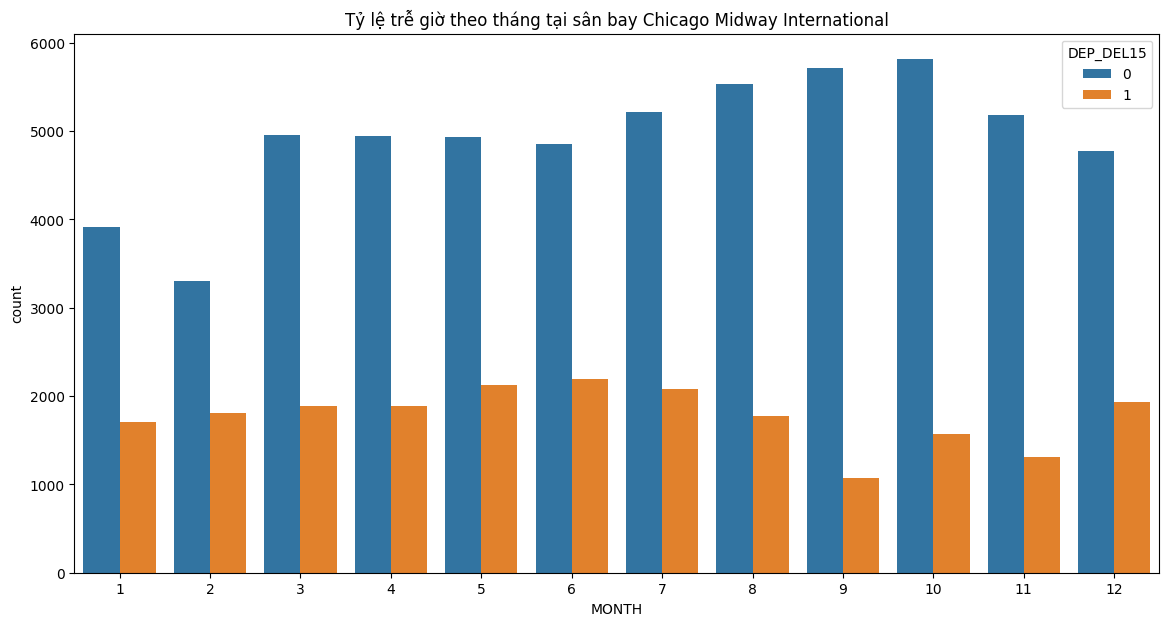

In [ ]:
chicago_data = df[df['DEPARTING_AIRPORT'] == 'Chicago Midway International']
# Phân tích tỷ lệ delay theo tháng
plt.figure(figsize=(14, 7))
sns.countplot(x='MONTH', hue='DEP_DEL15', data=chicago_data)
plt.title('Tỷ lệ trễ giờ theo tháng tại sân bay Chicago Midway International')
plt.show()

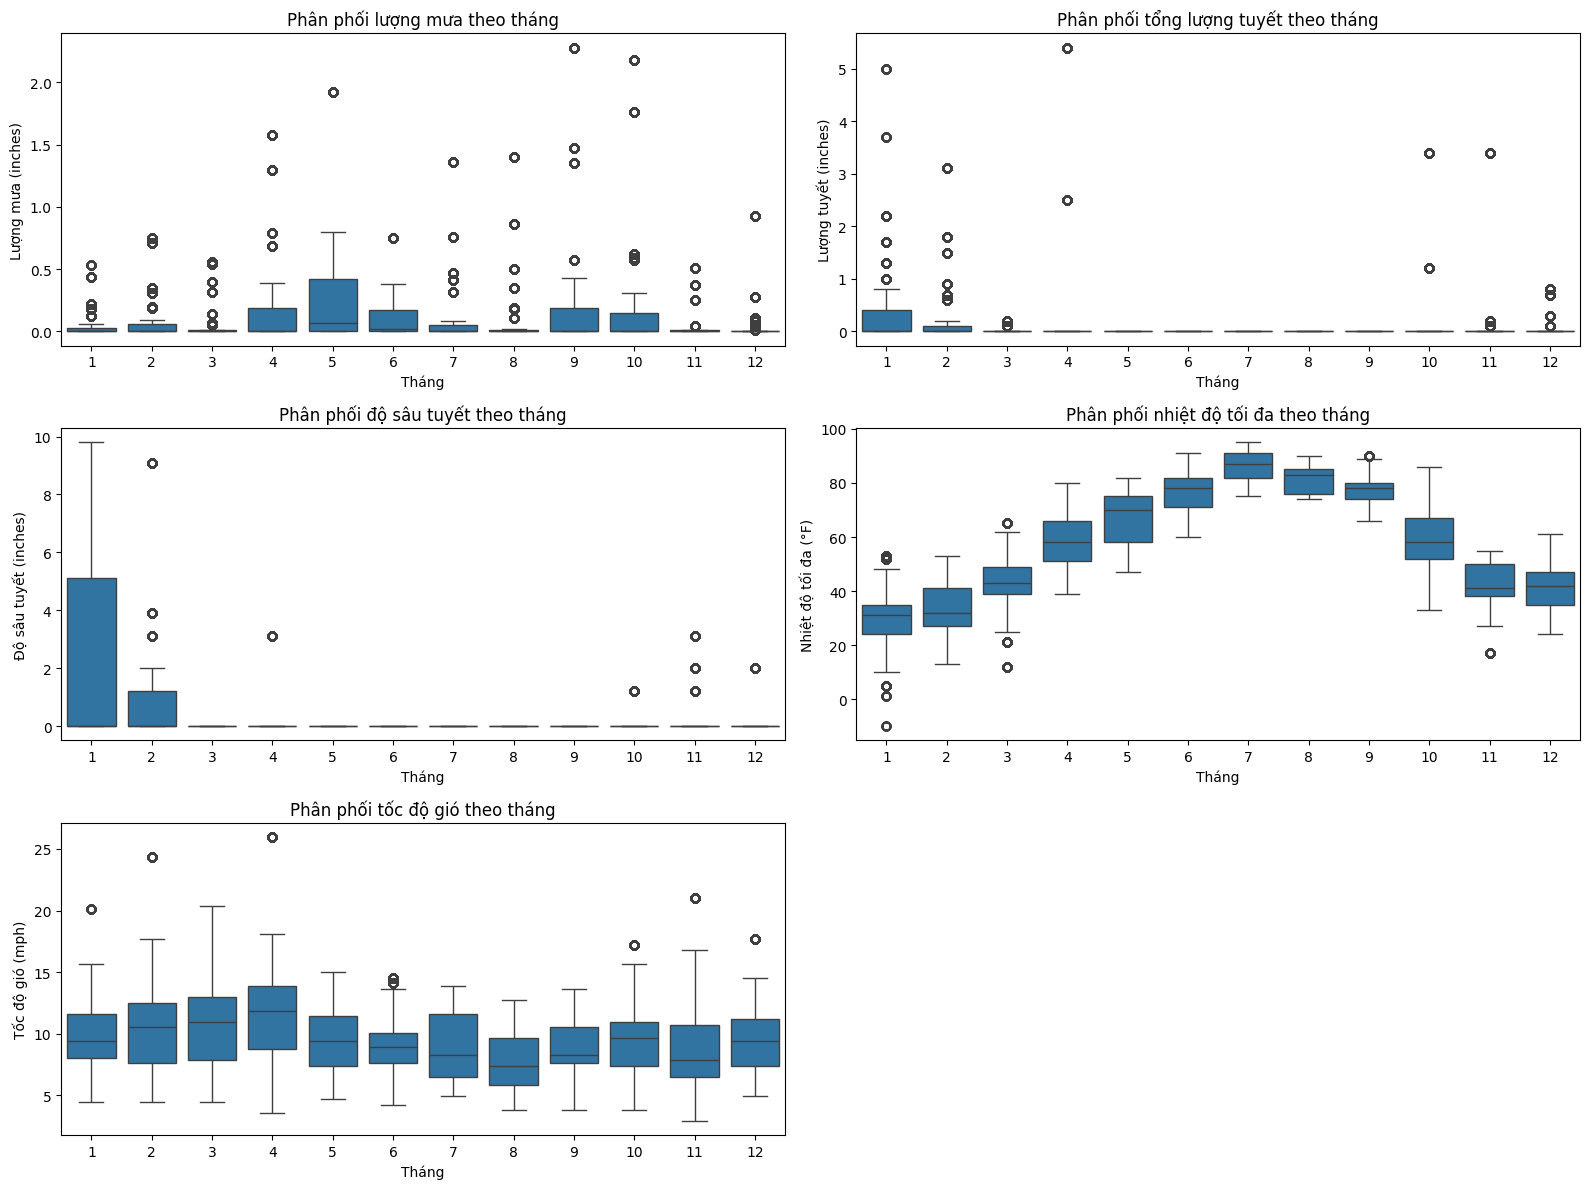

In [ ]:
plt.figure(figsize=(16, 12))
# Lượng mưa
plt.subplot(3, 2, 1)
sns.boxplot(data=chicago_data, x='MONTH', y='PRCP')
plt.title('Phân phối lượng mưa theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa (inches)')

# Tổng lượng tuyết
plt.subplot(3, 2, 2)
sns.boxplot(data=chicago_data, x='MONTH', y='SNOW')
plt.title('Phân phối tổng lượng tuyết theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Lượng tuyết (inches)')

# Độ sâu tuyết
plt.subplot(3, 2, 3)
sns.boxplot(data=chicago_data, x='MONTH', y='SNWD')
plt.title('Phân phối độ sâu tuyết theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Độ sâu tuyết (inches)')

# Nhiệt độ tối đa
plt.subplot(3, 2, 4)
sns.boxplot(data=chicago_data, x='MONTH', y='TMAX')
plt.title('Phân phối nhiệt độ tối đa theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ tối đa (°F)')

# Tốc độ gió
plt.subplot(3, 2, 5)
sns.boxplot(data=chicago_data, x='MONTH', y='AWND')
plt.title('Phân phối tốc độ gió theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tốc độ gió (mph)')

plt.tight_layout()
plt.show()


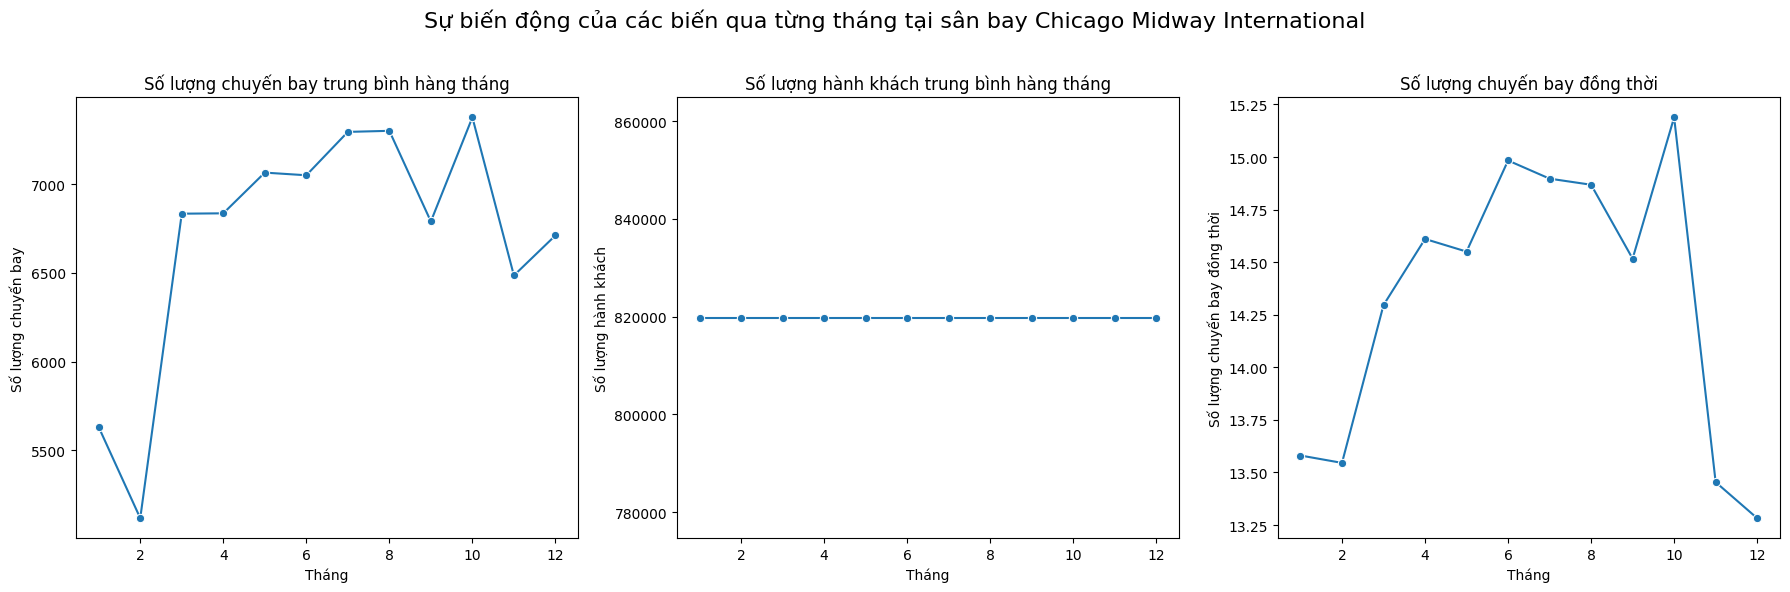

In [ ]:
monthly_avg = chicago_data.groupby('MONTH').agg({
    'AIRPORT_FLIGHTS_MONTH': 'mean',
    'AVG_MONTHLY_PASS_AIRPORT': 'mean',
    'CONCURRENT_FLIGHTS': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Sự biến động của các biến qua từng tháng tại sân bay Chicago Midway International', fontsize=16)
# Số lượng chuyến bay trung bình hàng tháng
sns.lineplot(ax=axes[0], data=monthly_avg, x='MONTH', y='AIRPORT_FLIGHTS_MONTH', marker='o')
axes[0].set_title('Số lượng chuyến bay trung bình hàng tháng')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Số lượng chuyến bay')
# Số lượng hành khách trung bình hàng tháng
sns.lineplot(ax=axes[1], data=monthly_avg, x='MONTH', y='AVG_MONTHLY_PASS_AIRPORT', marker='o')
axes[1].set_title('Số lượng hành khách trung bình hàng tháng')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Số lượng hành khách')
# Số lượng chuyến bay đồng thời
sns.lineplot(ax=axes[2], data=monthly_avg, x='MONTH', y='CONCURRENT_FLIGHTS', marker='o')
axes[2].set_title('Số lượng chuyến bay đồng thời')
axes[2].set_xlabel('Tháng')
axes[2].set_ylabel('Số lượng chuyến bay đồng thời')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


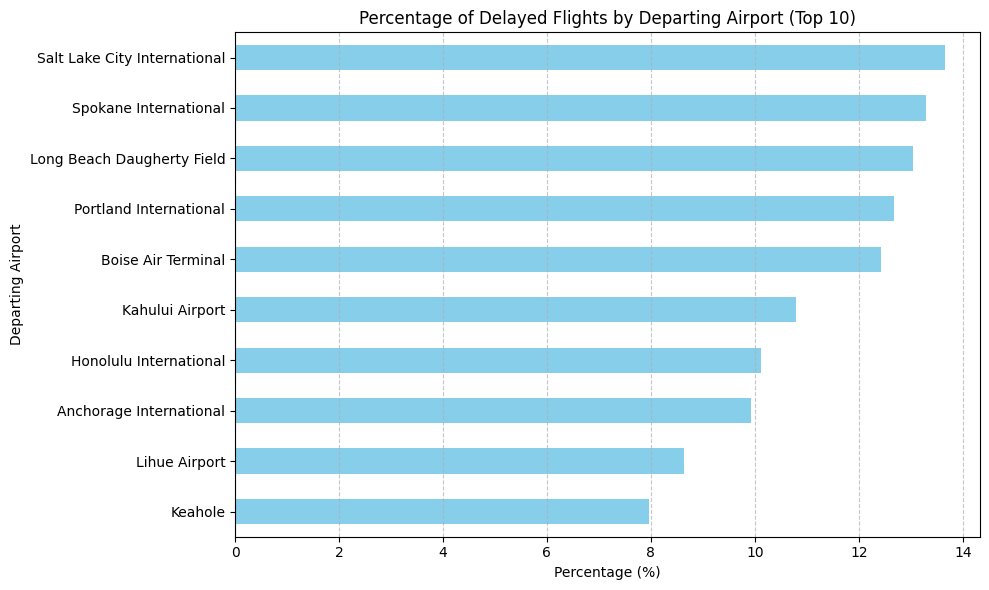

In [ ]:
## top 10 sân bay có tỉ lệ trễ thấp nhất
delayed_flights_per_airport = df[df['DEP_DEL15'] == 1].groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()
total_flights_per_airport = df.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()
delayed_percentage_per_airport = (delayed_flights_per_airport / total_flights_per_airport) * 100

delayed_percentage_per_airport = delayed_percentage_per_airport.sort_values(ascending=True)

top_n_airports = 10
delayed_percentage_per_airport = delayed_percentage_per_airport.head(top_n_airports)
plt.figure(figsize=(10, 6))
delayed_percentage_per_airport.plot(kind='barh', color='skyblue')
plt.title(f'Percentage of Delayed Flights by Departing Airport (Top {top_n_airports})')
plt.xlabel('Percentage (%)')
plt.ylabel('Departing Airport')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(range(len(delayed_percentage_per_airport)), delayed_percentage_per_airport.index)
plt.tight_layout()
plt.show()

### **Weather**

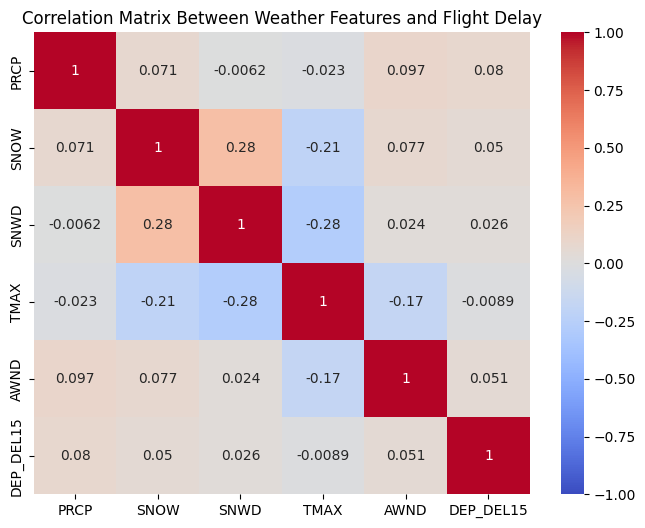

In [ ]:
weather_features = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
cor = df[weather_features + ['DEP_DEL15']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Weather Features and Flight Delay')
plt.show()

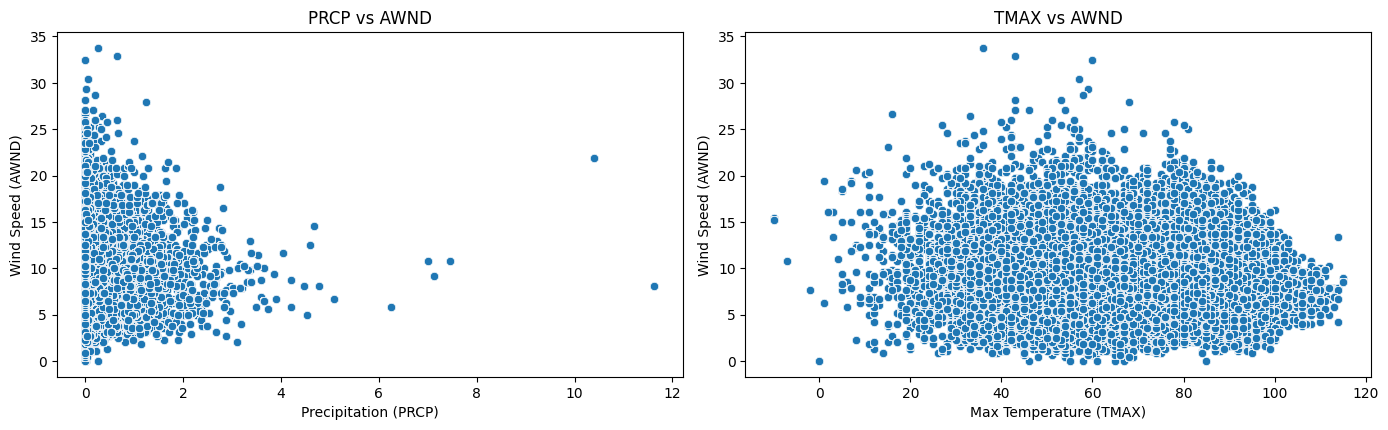

In [ ]:
plt.figure(figsize=(14, 8))
# Scatter plot of PRCP vs AWND
plt.subplot(2, 2, 1)
sns.scatterplot(x='PRCP', y='AWND', data=df)
plt.title('PRCP vs AWND')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Wind Speed (AWND)')
# Scatter plot of TMAX vs AWND
plt.subplot(2, 2, 2)
sns.scatterplot(x='TMAX', y='AWND', data=df)
plt.title('TMAX vs AWND')
plt.xlabel('Max Temperature (TMAX)')
plt.ylabel('Wind Speed (AWND)')
plt.tight_layout()
plt.show()

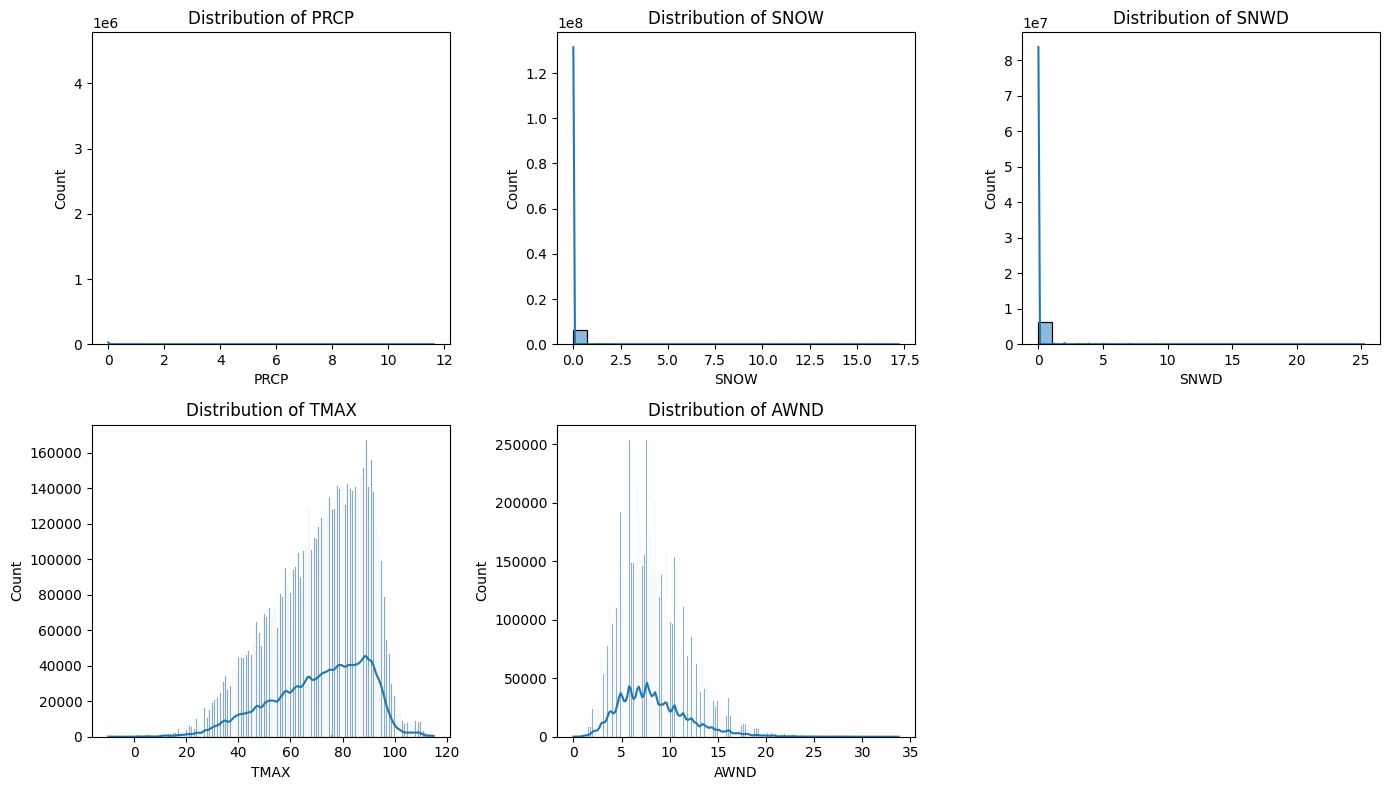

In [ ]:
weather = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
# histograms
plt.figure(figsize=(14, 8))
for i, feature in enumerate(weather, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


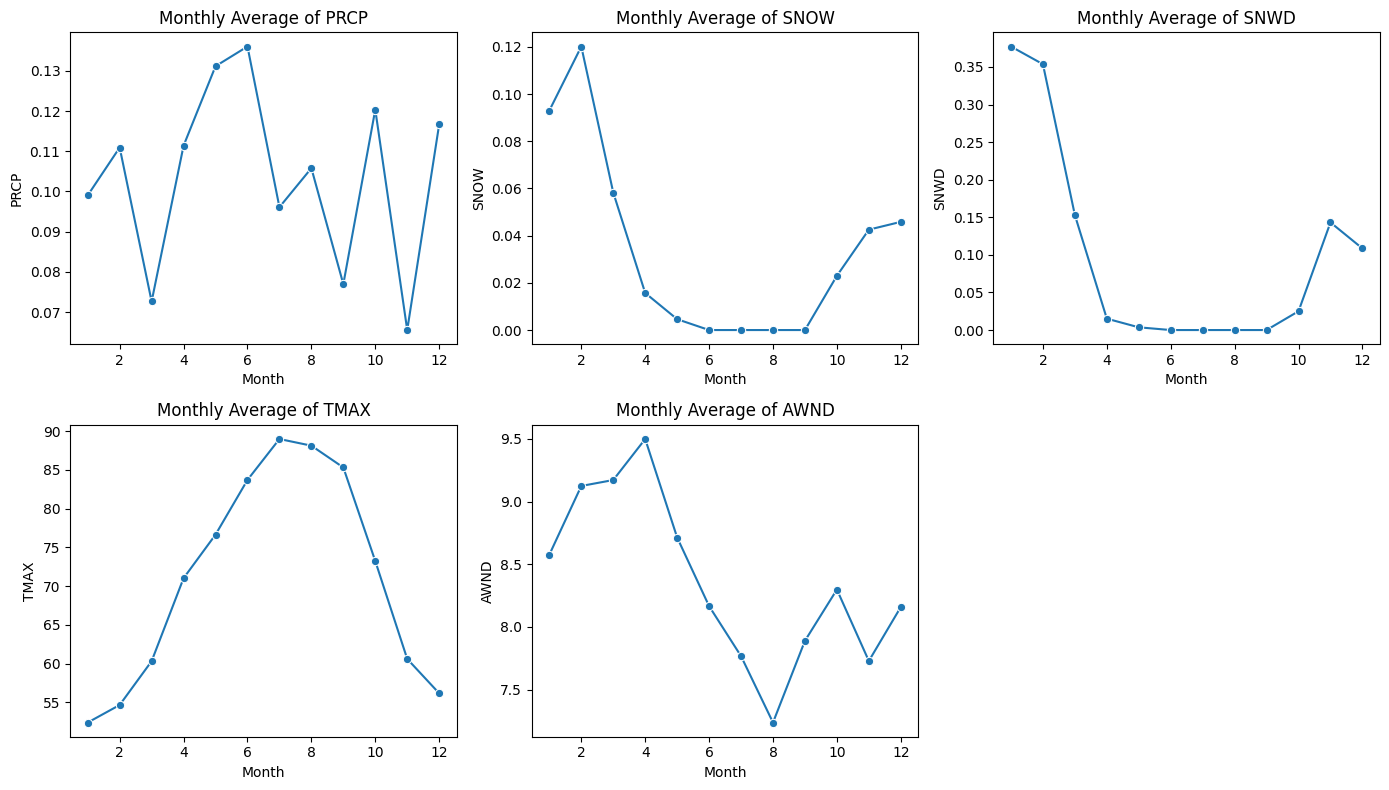

In [ ]:
monthly_weather = df.groupby('MONTH')[weather_features].mean().reset_index()

plt.figure(figsize=(14, 8))
for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x='MONTH', y=feature, data=monthly_weather, marker='o')
    plt.title(f'Monthly Average of {feature}')
    plt.xlabel('Month')
plt.tight_layout()
plt.show()


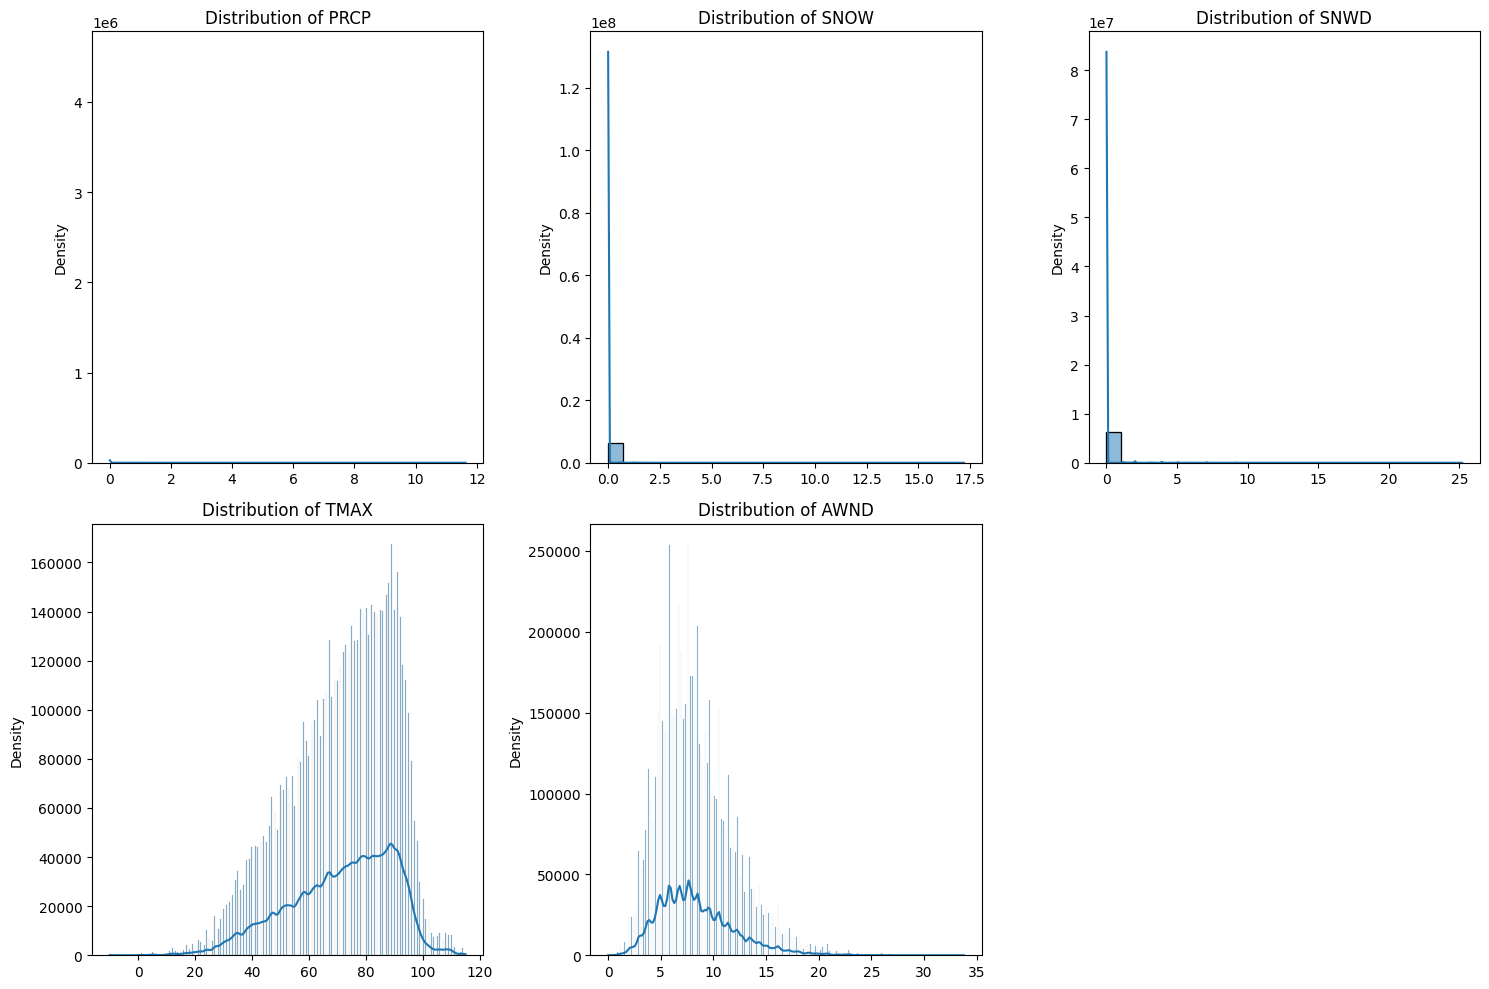

In [ ]:
num_rows = 2
num_cols = (len(weather_variables) + 1) // num_rows
plt.figure(figsize=(15, 10))

# Vẽ từng biến thời tiết lần lượt
for i, var in enumerate(weather_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_5200\784659467.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_awnd = df.groupby('AWND_BIN')['DEP_DEL15'].mean().reset_index()
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_5200\784659467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AWND_BIN', y='DEP_DEL15', data=delay_by_awnd, palette='viridis')


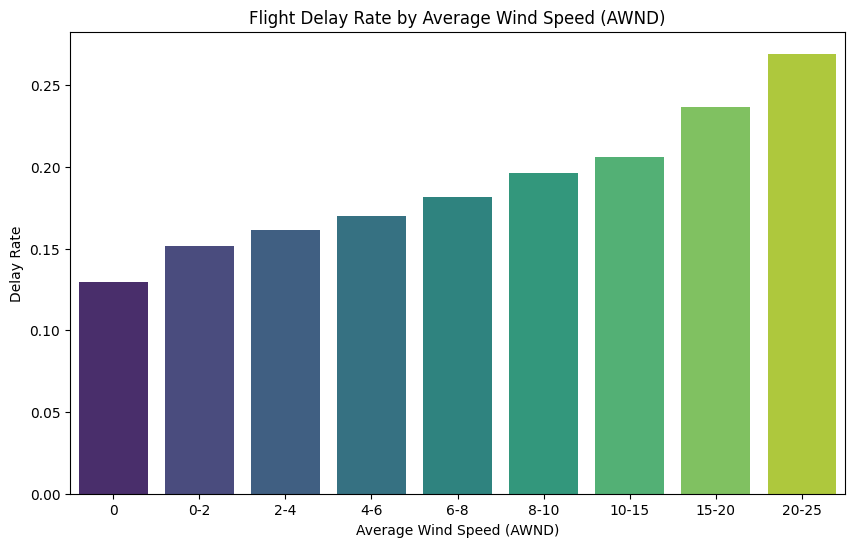

In [ ]:
df['AWND_BIN'] = pd.cut(df['AWND'], bins=[-1, 0, 2, 4, 6, 8, 10, 15, 20, 25], labels=['0', '0-2', '2-4', '4-6', '6-8', '8-10', '10-15', '15-20', '20-25'])
delay_by_awnd = df.groupby('AWND_BIN')['DEP_DEL15'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='AWND_BIN', y='DEP_DEL15', data=delay_by_awnd, palette='viridis')
plt.title('Flight Delay Rate by Average Wind Speed (AWND)')
plt.xlabel('Average Wind Speed (AWND)')
plt.ylabel('Delay Rate')
plt.show()

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_5200\1476198426.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_snow = df.groupby('SNOW_BIN')['DEP_DEL15'].mean().reset_index()
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_5200\1476198426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SNOW_BIN', y='DEP_DEL15', data=delay_by_snow, palette='viridis')


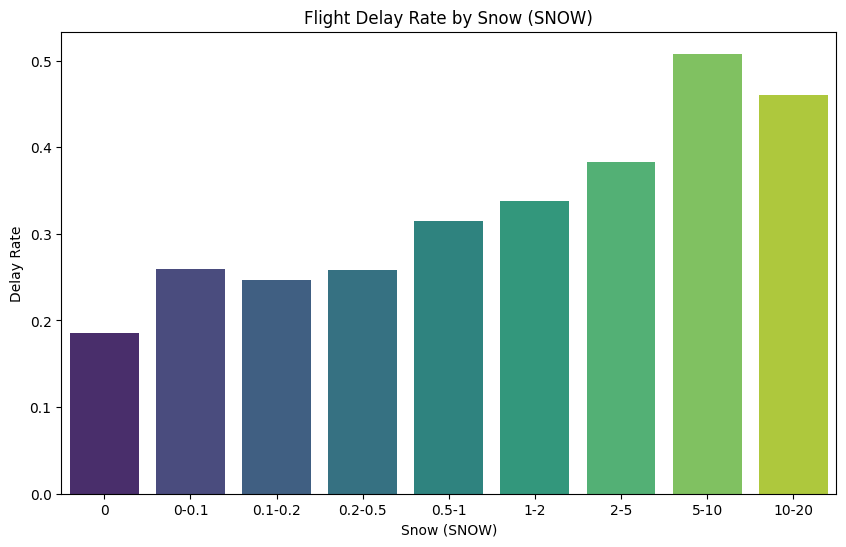

In [ ]:
df['SNOW_BIN'] = pd.cut(df['SNOW'], bins=[-1, 0, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20], labels=['0', '0-0.1', '0.1-0.2', '0.2-0.5', '0.5-1', '1-2', '2-5', '5-10', '10-20'])
delay_by_snow = df.groupby('SNOW_BIN')['DEP_DEL15'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='SNOW_BIN', y='DEP_DEL15', data=delay_by_snow, palette='viridis')
plt.title('Flight Delay Rate by Snow (SNOW)')
plt.xlabel('Snow (SNOW)')
plt.ylabel('Delay Rate')
plt.show()

#

# 3. Xử lý dữ liệu

**Kiểm tra balance data**

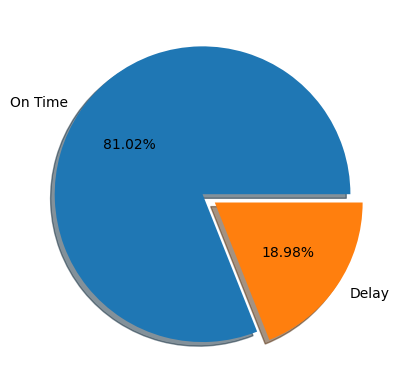

In [ ]:
#check the balance data
sizes = [df.DEP_DEL15[df["DEP_DEL15"]==0].count(), df.DEP_DEL15[df["DEP_DEL15"]== 1].count()]
labels = ["On Time", "Delay"]
plt.pie(sizes, labels= labels, explode= (0, 0.1), shadow= True, autopct= "%.2f%%")
plt.show()

**Correlation Coefficient**

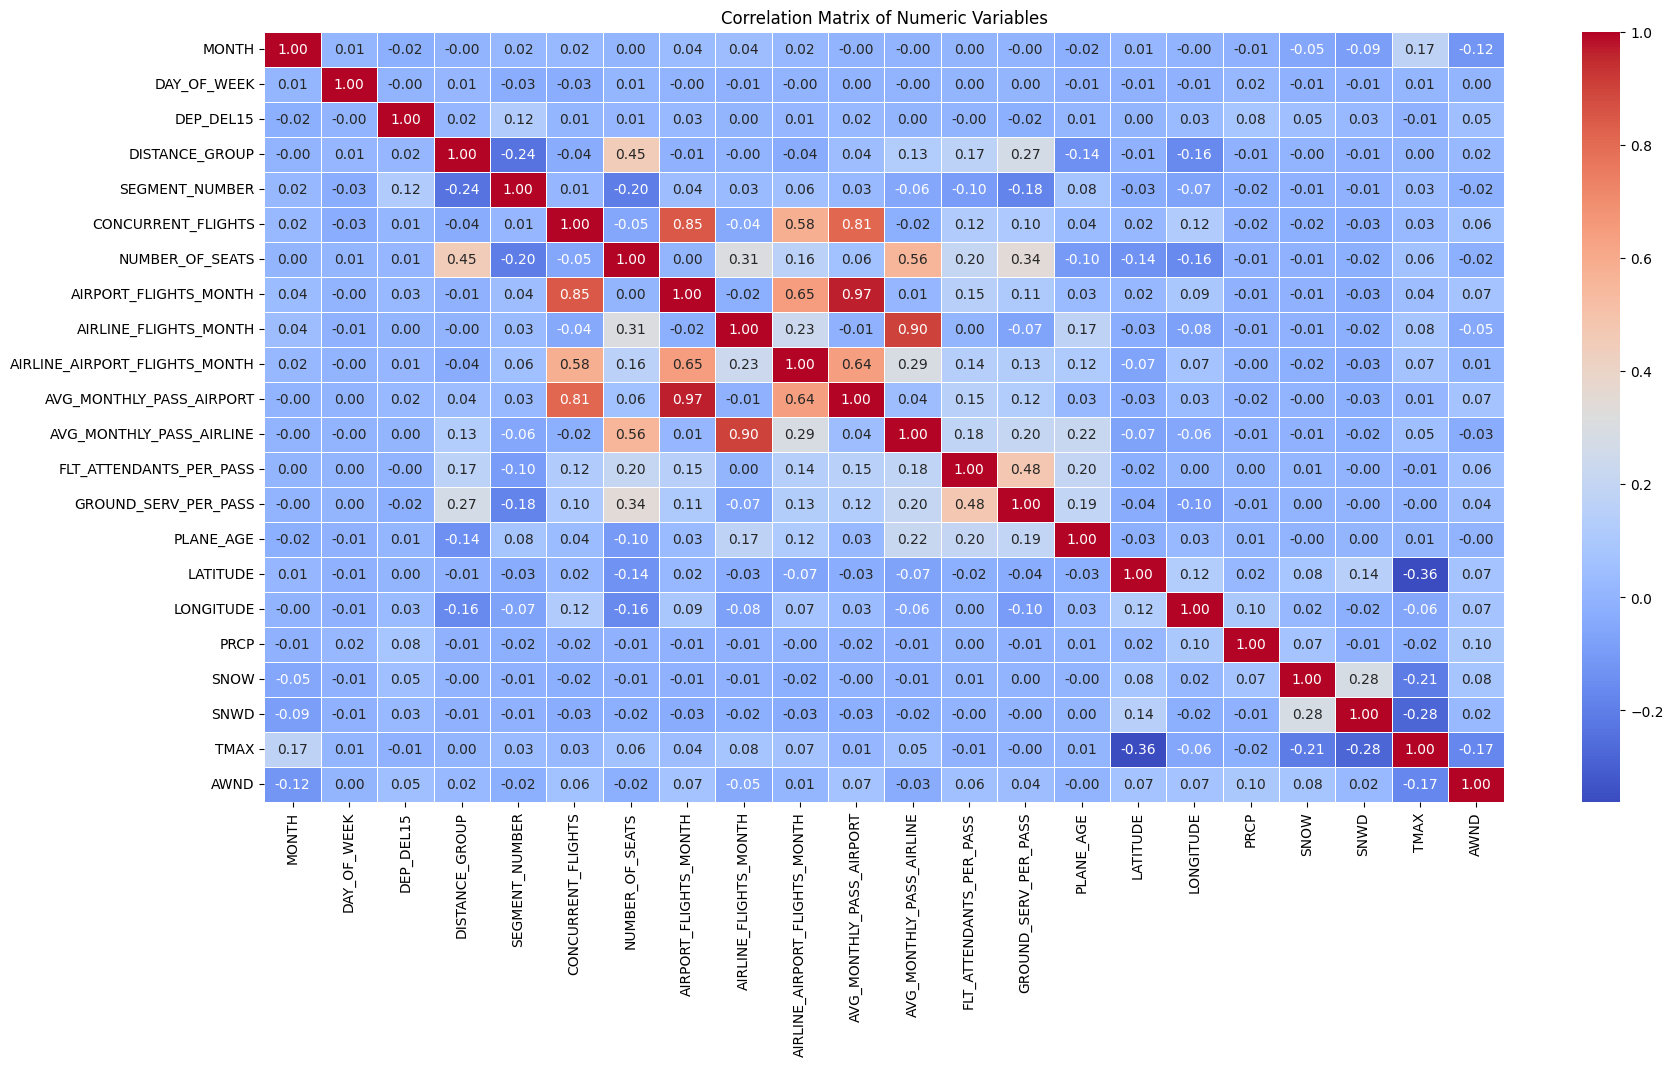

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
# Vẽ ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [ ]:
df.columns

Index(['MONTH', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW',
       'SNWD', 'TMAX', 'AWND'],
      dtype='object')

In [9]:
df = df.drop(['DAY_OF_WEEK', 'AIRLINE_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','LATITUDE','AVG_MONTHLY_PASS_AIRPORT'], axis=1)
df.head()
# AVG_MONTHLY_PASS_AIRPORT do hệ số tương quan với AIRPORT_FLIGHTS_MONTH cao, trên 90%

,MONTH,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,5873,0.000099,8,McCarran International,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156
1,1,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,1174,0.000149,3,McCarran International,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156
2,1,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,1174,0.000149,18,McCarran International,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156
3,1,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,1174,0.000149,2,McCarran International,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156
4,1,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,1257,0.000125,1,McCarran International,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156


**DEPARTING_STATE**

In [ ]:
df.head(10)

,MONTH,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,5873,0.000099,8,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,1174,0.000149,3,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,1174,0.000149,18,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,1174,0.000149,2,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,1257,0.000125,1,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
5,1,0,0001-0559,3,1,10,180,Frontier Airlines Inc.,13056,581,0.000007,5,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
6,1,0,0700-0759,6,1,29,186,Frontier Airlines Inc.,13056,581,0.000007,2,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
7,1,1,0001-0559,7,1,10,186,Frontier Airlines Inc.,13056,581,0.000007,3,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
8,1,0,0001-0559,7,1,10,180,Frontier Airlines Inc.,13056,581,0.000007,3,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
9,1,0,0600-0659,8,1,27,186,Frontier Airlines Inc.,13056,581,0.000007,1,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [10]:
airports_df = pd.read_csv('airports_list.csv')
# Merge the DataFrames to add the state information to the departing airport
df = df.merge(airports_df[['DEPARTING_AIRPORT', 'state']], left_on='DEPARTING_AIRPORT', right_on='DEPARTING_AIRPORT', how='left')
# Rename the state column to DEPARTING_STATE for clarity
df.rename(columns={'state': 'DEPARTING_STATE'}, inplace=True)


In [11]:
df = df.drop(['DEPARTING_AIRPORT'], axis=1)

In [ ]:
df.head(5)

,MONTH,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,DEPARTING_STATE
0,1,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,5873,...,8,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,NV
1,1,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,1174,...,3,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,NV
2,1,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,1174,...,18,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,NV
3,1,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,1174,...,2,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,NV
4,1,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,1257,...,1,McCarran International,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,NV


**NUMBER OF SEAT**

In [12]:
bins = [0, 7, 100, 500]
labels = ['0', '1', '2']
# small (0): 0 <- 7
# medium(1): 7 <- 100
# large(2): 100 <- 500
df['Capacity'] = pd.cut(df['NUMBER_OF_SEATS'], bins=bins, labels=labels)
df.head()

,MONTH,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,DEPARTING_STATE,Capacity
0,1,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,5873,...,8,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
1,1,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,1174,...,3,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
2,1,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,1174,...,18,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
3,1,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,1174,...,2,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
4,1,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,1257,...,1,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2


In [13]:
df['Capacity'] = df['Capacity'].astype(int)
df.drop(columns=['NUMBER_OF_SEATS'], inplace=True)
df.head()

,MONTH,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,GROUND_SERV_PER_PASS,PLANE_AGE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,DEPARTING_STATE,Capacity
0,1,0,0800-0859,2,1,25,Southwest Airlines Co.,13056,5873,0.000099,8,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
1,1,0,0700-0759,7,1,29,Delta Air Lines Inc.,13056,1174,0.000149,3,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
2,1,0,0600-0659,7,1,27,Delta Air Lines Inc.,13056,1174,0.000149,18,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
3,1,0,0600-0659,9,1,27,Delta Air Lines Inc.,13056,1174,0.000149,2,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2
4,1,0,0001-0559,7,1,10,Spirit Air Lines,13056,1257,0.000125,1,-115.125,NONE,0.0,0.0,0.0,65.0,2.910156,NV,2


In [14]:
#One-hot encoding
variables = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_STATE']
df = pd.get_dummies(df, columns=variables, drop_first = True)
print(df.head())

   MONTH  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  \
0      1          0               2               1                  25   
1      1          0               7               1                  29   
2      1          0               7               1                  27   
3      1          0               9               1                  27   
4      1          0               7               1                  10   

   AIRPORT_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  GROUND_SERV_PER_PASS  \
0                  13056                           5873              0.000099   
1                  13056                           1174              0.000149   
2                  13056                           1174              0.000149   
3                  13056                           1174              0.000149   
4                  13056                           1257              0.000125   

   PLANE_AGE  LONGITUDE  ... DEPARTING_STATE_ PA  DEPARTING_ST

In [15]:
#Label encoding
le = LabelEncoder()
df['PREVIOUS_AIRPORT'] = le.fit_transform(df['PREVIOUS_AIRPORT'])

In [ ]:
df.head()

,MONTH,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,GROUND_SERV_PER_PASS,PLANE_AGE,LONGITUDE,...,DEPARTING_STATE_ PA,DEPARTING_STATE_ PR,DEPARTING_STATE_ RI,DEPARTING_STATE_ SC,DEPARTING_STATE_ TN,DEPARTING_STATE_ TX,DEPARTING_STATE_ UT,DEPARTING_STATE_ VA,DEPARTING_STATE_ WA,DEPARTING_STATE_ WI
0,1,0,2,1,25,13056,5873,0.000099,8,-115.125,...,False,False,False,False,False,False,False,False,False,False
1,1,0,7,1,29,13056,1174,0.000149,3,-115.125,...,False,False,False,False,False,False,False,False,False,False
2,1,0,7,1,27,13056,1174,0.000149,18,-115.125,...,False,False,False,False,False,False,False,False,False,False
3,1,0,9,1,27,13056,1174,0.000149,2,-115.125,...,False,False,False,False,False,False,False,False,False,False
4,1,0,7,1,10,13056,1257,0.000125,1,-115.125,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['DEP_DEL15'].value_counts()

DEP_DEL15
0    5261694
1    1227368
Name: count, dtype: int64

In [ ]:
df.to_csv('flight_data.csv', index=False)

# 4. Model

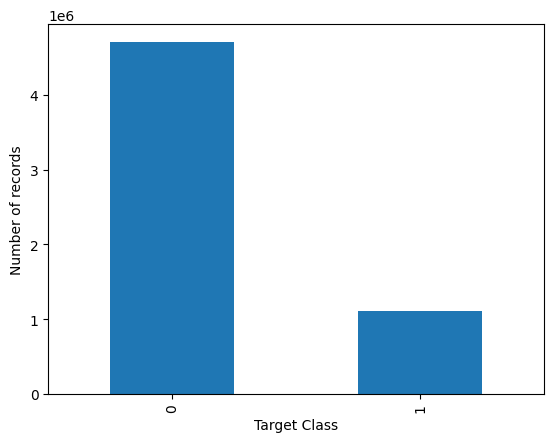

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEP_DEL15', axis=1), df['DEP_DEL15'], test_size=0.1, random_state=42)
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [17]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

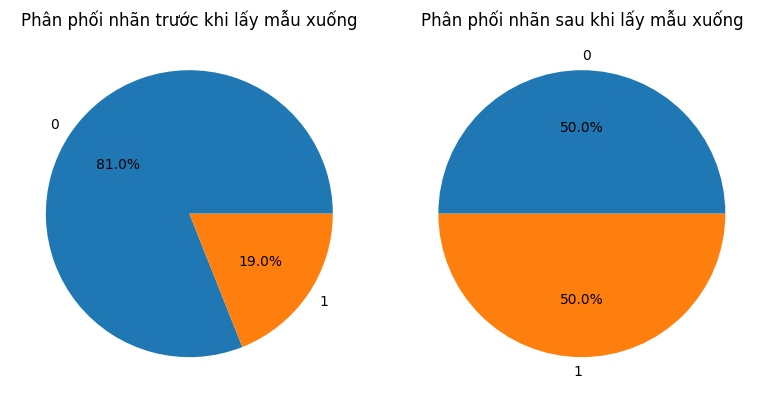

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
labels_before, counts_before = np.unique(y_train, return_counts=True)
labels_after, counts_after = np.unique(y_train_under, return_counts=True)

axs[0].pie(counts_before, labels=labels_before, autopct='%1.1f%%')
axs[0].set_title('Phân phối nhãn trước khi lấy mẫu xuống')

axs[1].pie(counts_after, labels=labels_after, autopct='%1.1f%%')
axs[1].set_title('Phân phối nhãn sau khi lấy mẫu xuống')
fig.tight_layout()
plt.show()


In [19]:
num_samples_0_before = sum(y_train == 0)
num_samples_1_before = sum(y_train == 1)
num_samples_0_after = sum(y_train_under == 0)
num_samples_1_after = sum(y_train_under == 1)

print("Số lượng mẫu nhãn 0 trước khi lấy mẫu xuống:", num_samples_0_before)
print("Số lượng mẫu nhãn 1 trước khi lấy mẫu xuống:", num_samples_1_before)
print("Số lượng mẫu nhãn 0 sau khi lấy mẫu xuống:", num_samples_0_after)
print("Số lượng mẫu nhãn 1 sau khi lấy mẫu xuống:", num_samples_1_after)


Số lượng mẫu nhãn 0 trước khi lấy mẫu xuống: 4710961
Số lượng mẫu nhãn 1 trước khi lấy mẫu xuống: 1103569
Số lượng mẫu nhãn 0 sau khi lấy mẫu xuống: 1103569
Số lượng mẫu nhãn 1 sau khi lấy mẫu xuống: 1103569


In [20]:
scaler = MinMaxScaler()
X_train_under = scaler.fit_transform(X_train_under)
X_test = scaler.transform(X_test)

## LogisticRegression

Linear Regression:
Accuracy: 0.59
Precision: 0.27
Recall: 0.66
F1-score: 0.38


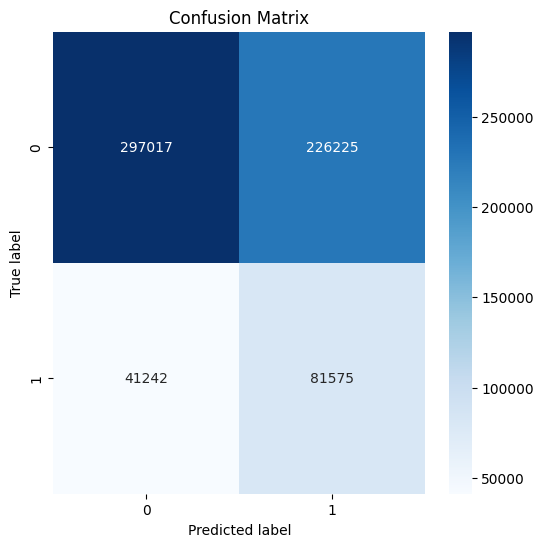

In [21]:
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f'Linear Regression:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## RF

Random Forest Classifier:
Accuracy: 0.60
Precision: 0.27
Recall: 0.67
F1-score: 0.39


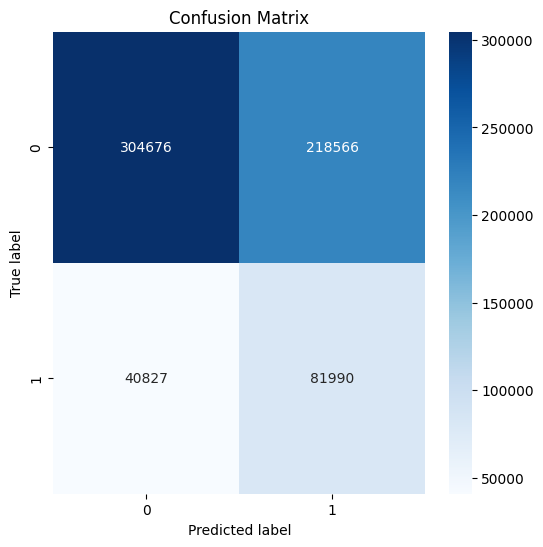

In [22]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf.fit(X_train_under, y_train_under)

y_pred_rf = rf.predict(X_test)

# Tính toán độ đo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest Classifier:')
print(f'Accuracy: {accuracy_rf:.2f}')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Gradient Boosting Trees**


Gradient Boosting Trees Classifier:
Accuracy: 0.62
Precision: 0.28
Recall: 0.64
F1-score: 0.39


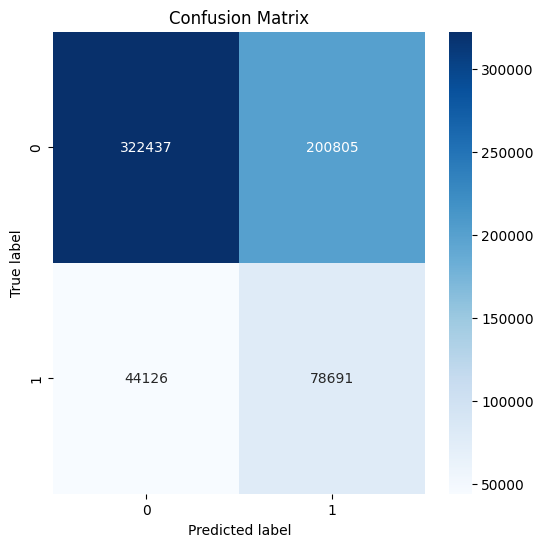

In [24]:
#Gradient Boosting Trees
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()
gbt.fit(X_train_under, y_train_under)
y_pred_gbt = gbt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gbt)
precision = precision_score(y_test, y_pred_gbt)
recall = recall_score(y_test, y_pred_gbt)
f1 = f1_score(y_test, y_pred_gbt)

print("\nGradient Boosting Trees Classifier:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred_gbt)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## XGBoots

XGBoost:
Accuracy: 0.69
Precision: 0.33
Recall: 0.66
F1-score: 0.44


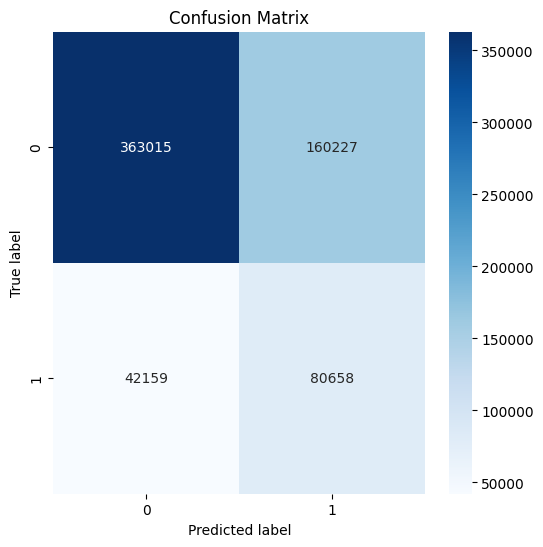

In [23]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.3,
    random_state=42
)
xgb.fit(X_train_under, y_train_under)
y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f'XGBoost:')
print(f'Accuracy: {accuracy :.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## important feature

In [ ]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.3,
    random_state=42
)
xgb.fit(X_train, y_train)

feature_importances = xgb.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Vẽ biểu đồ
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print(importance_df)
# Vẽ biểu đồ
plt.figure(figsize=(16, 10))
plot_importance(xgb, max_num_features=25, importance_type='gain')
plt.show()